# Visualizing marker genes

**Author:** Fidel Ramirez.

**Note**: Download the notebook by clicking on the _Edit on GitHub_ button. On GitHub, you can download using the _Raw_ button via right-click and _Save Link As_. Alternatively, download the whole [scanpy-tutorial](https://github.com/theislab/scanpy-tutorials) repository.

In [1]:
import scanpy.api as sc
import pandas as pd
from matplotlib import rcParams
sc.logging.print_versions()

scanpy==1.3.6 anndata==0.6.16 numpy==1.14.6 scipy==1.1.0 pandas==0.23.4 scikit-learn==0.19.1 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 


In [2]:
sc.set_figure_params(dpi=80)

Load the data.

In [3]:
pbmc = sc.datasets.pbmc68k_reduced()

The data was originally obtained from the [10x PBMC 68k dataset](https://support.10xgenomics.com/single-cell-gene-expression/datasets). The dataset was filtered and a sample of 700 cells and 765 highly variable genes was kept.

In this AnnData object, PCA and UMAP are already computed. Also, annotations related to louvain clustering and cell cycle detection are present in `pbmc.obs`

In [4]:
pbmc

AnnData object with n_obs × n_vars = 700 × 765 
    obs: 'bulk_labels', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'louvain'
    var: 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'bulk_labels_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

To modify the default figure size use rcParams

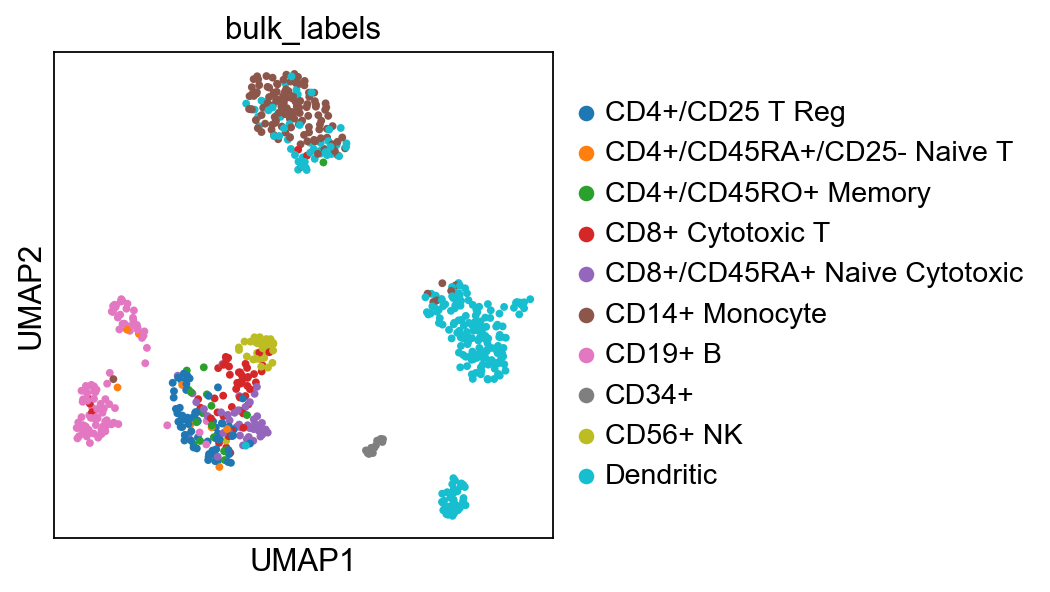

In [5]:
sc.pl.umap(pbmc, color='bulk_labels', s=50)

A list of marker genes from literature.

In [6]:
marker_genes = ['CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ',  'LGALS3', 'S100A8', 'GNLY', 'NKG7', 'KLRB1',  
                'FCGR3A', 'FCER1A', 'CST3']

## Stacked violins

Plot marker genes per cluster using stacked violin plots.

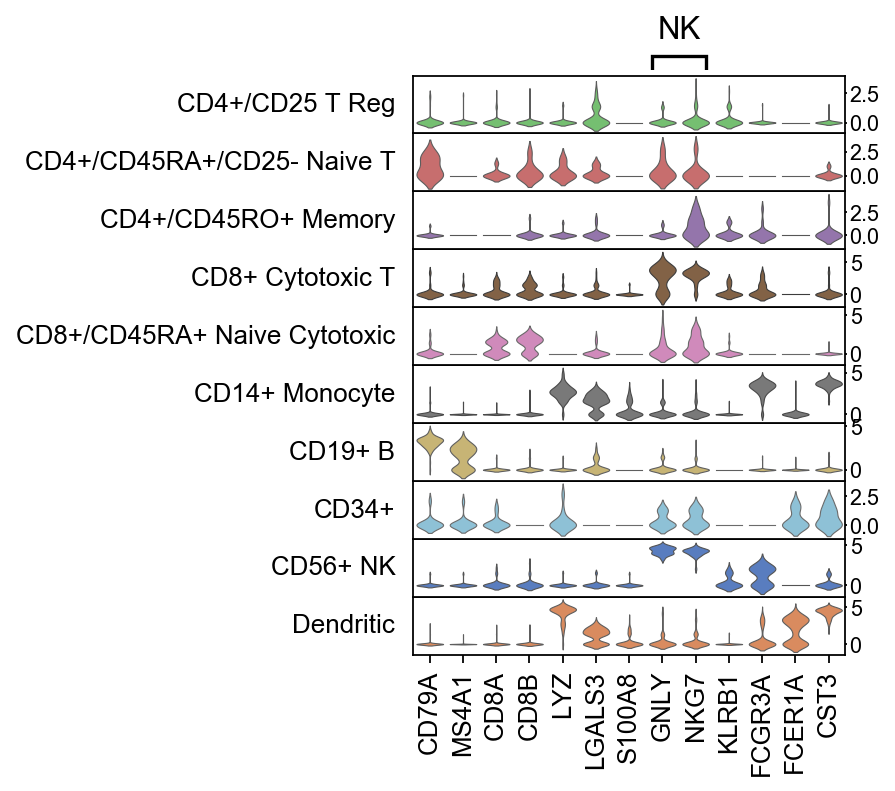

In [7]:
ax = sc.pl.stacked_violin(
    pbmc, marker_genes, groupby='bulk_labels',
    var_group_positions=[(7, 8)], var_group_labels=['NK'])

Same as before but swapping the axes and with dendrogram (notice that the categories are reordered).

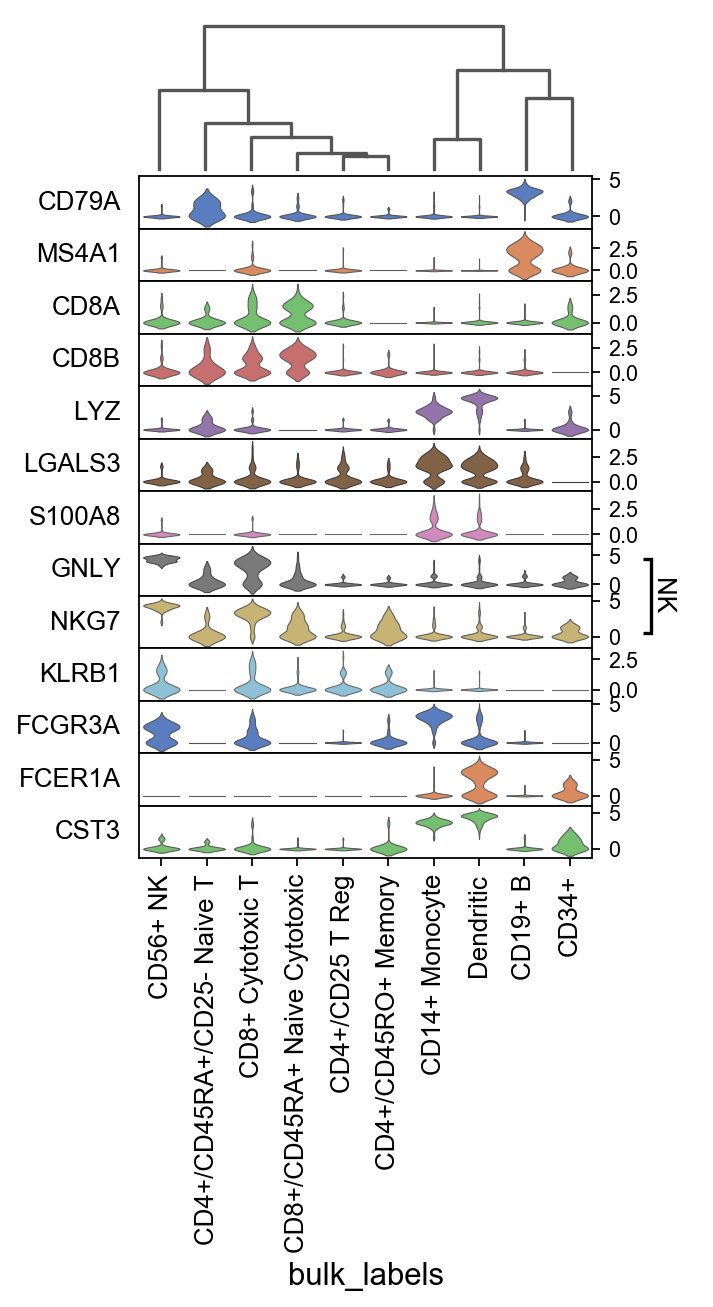

In [8]:
ax = sc.pl.stacked_violin(
    pbmc, marker_genes, groupby='bulk_labels', swap_axes=True, 
    var_group_positions=[(7, 8)], var_group_labels=['NK'], dendrogram=True)

## Dot plots

Visualize gene expression using dotplot.

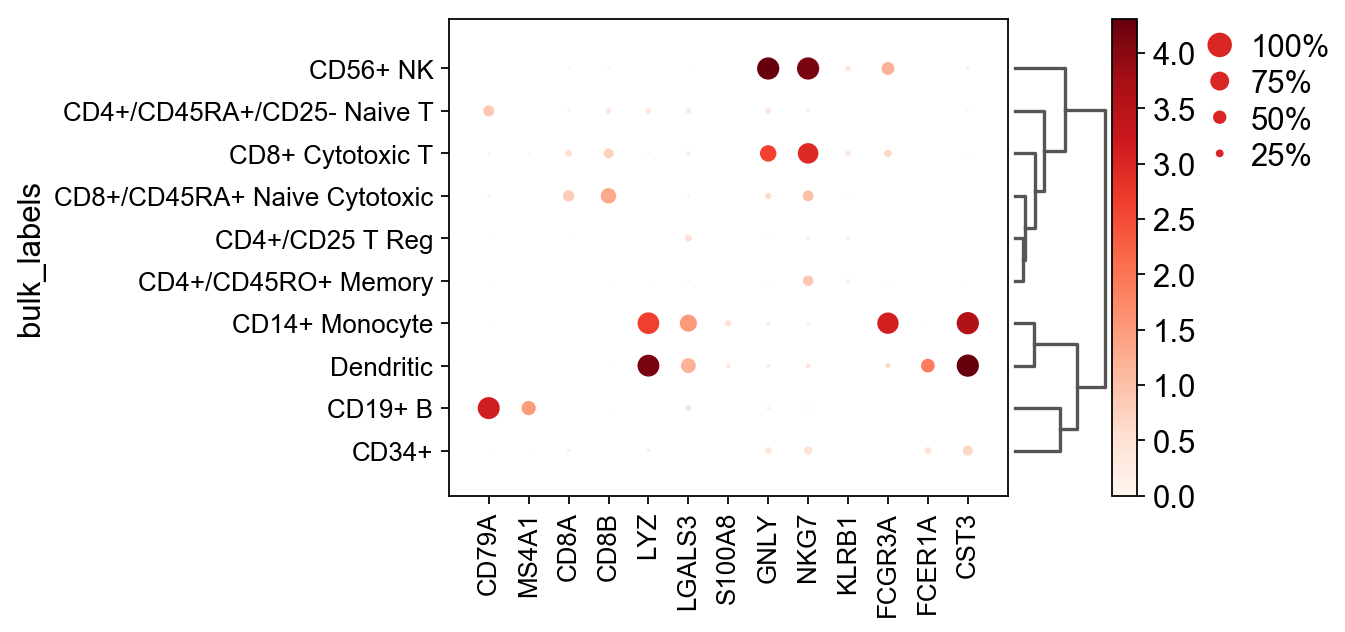

In [9]:
ax = sc.pl.dotplot(pbmc, marker_genes, groupby='bulk_labels', dendrogram=True)

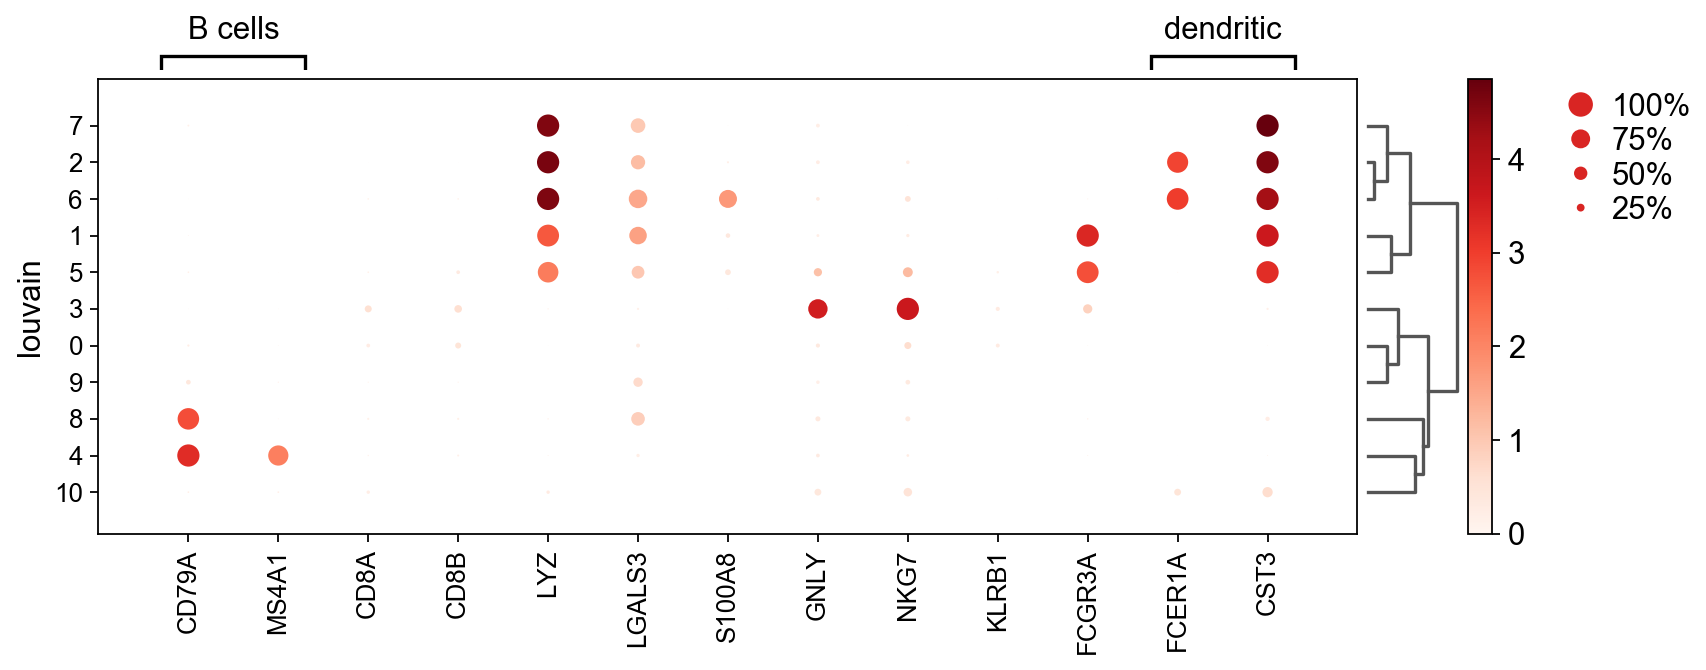

In [10]:
ax = sc.pl.dotplot(
    pbmc, marker_genes, groupby='louvain', 
    var_group_positions=[(0,1), (11, 12)], 
    var_group_labels=['B cells', 'dendritic'], 
    figsize=(12,4), var_group_rotation=0, dendrogram=True)

## Matrix plots

Visualize gene expression using matrixplot.

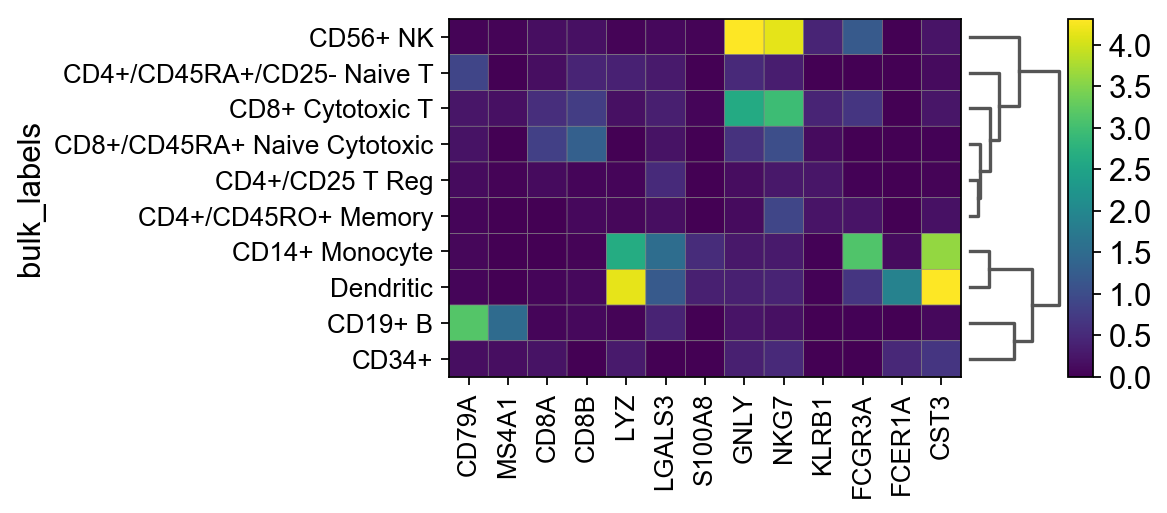

In [11]:
ax = sc.pl.matrixplot(pbmc, marker_genes, groupby='bulk_labels', dendrogram=True)

In [12]:
marker_genes_2 = [x for x in marker_genes if x in pbmc.var_names]

Same as before, but using scaled gene values

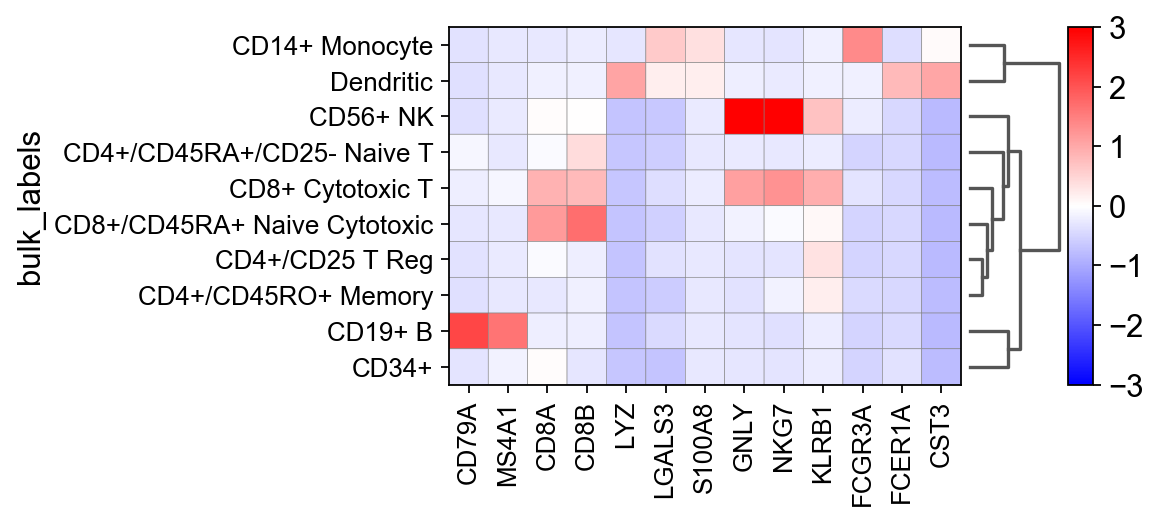

In [13]:
ax = sc.pl.matrixplot(pbmc, marker_genes_2, groupby='bulk_labels', dendrogram=True, use_raw=False, vmin=-3, vmax=3, cmap='bwr')

## Heatmaps

Visualize gene expression using heatmap.

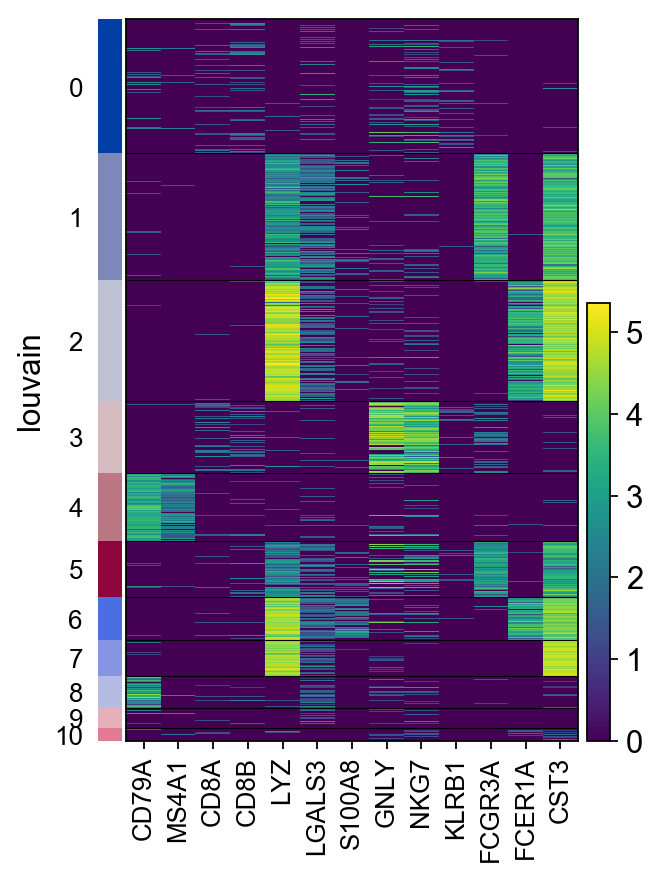

In [14]:
ax = sc.pl.heatmap(pbmc,marker_genes, groupby='louvain')

Same as before but using `use_raw=False` which uses a divergent colormap. Some genes are highlighted and the
figure size is adjusted.

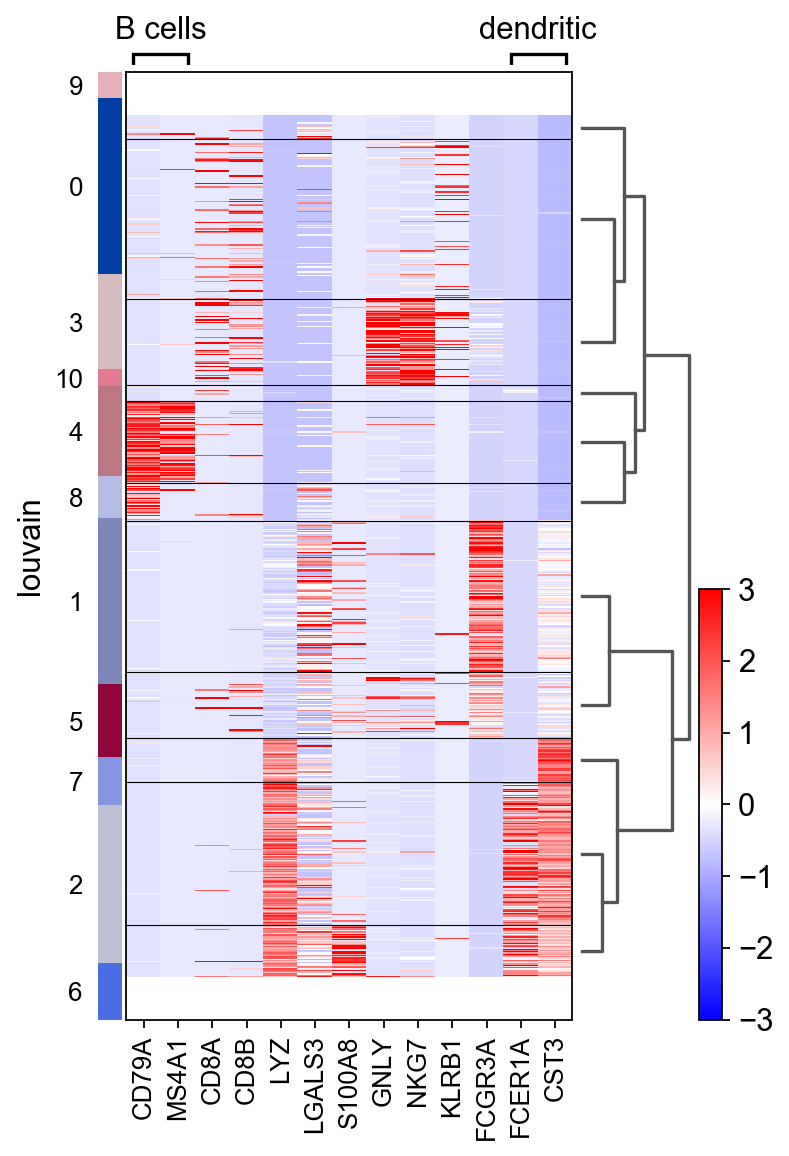

In [15]:
ax = sc.pl.heatmap(
    pbmc, marker_genes, groupby='louvain', figsize=(5, 8), 
    var_group_positions=[(0,1), (11, 12)], use_raw=False,
    var_group_labels=['B cells', 'dendritic'], var_group_rotation=0, dendrogram=True)

## Tracksplot

Visualize gene expression using tracksplot.

In [16]:
import numpy as np
ad = pbmc.copy()  # track plot data is better visualized using the non-log counts
ad.raw.X.data = np.expm1(ad.raw.X.data)

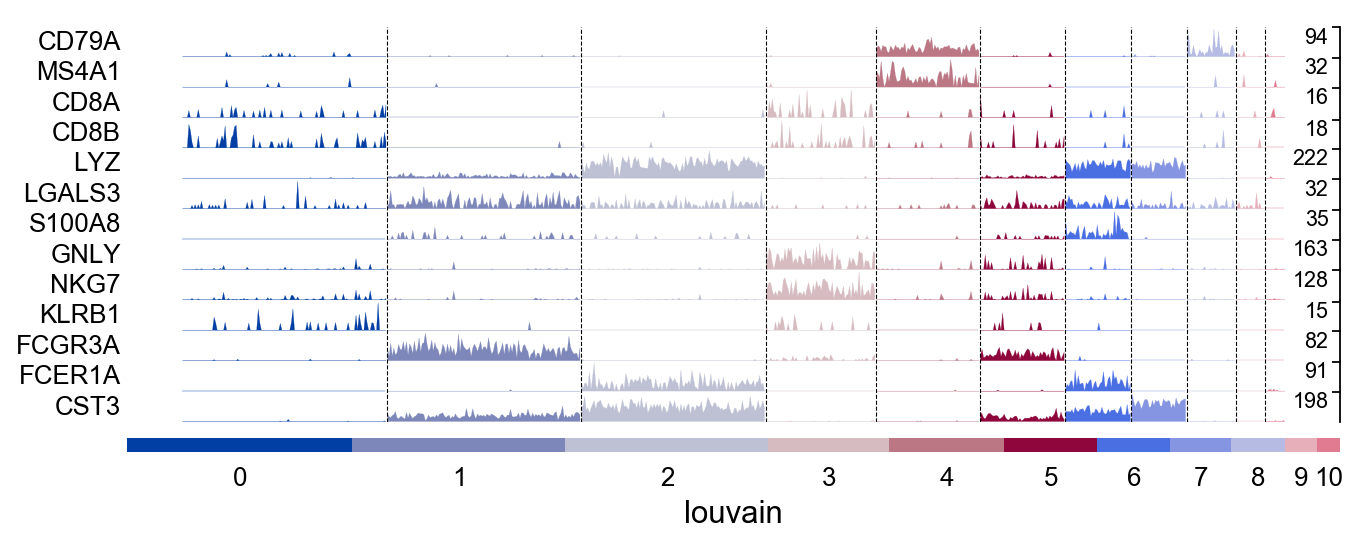

In [17]:
ax = sc.pl.tracksplot(ad,marker_genes, groupby='louvain')

## Convenience functions for `rank_genes_groups` results

For convenience, all of the previous functions are directly available for visualizing results of `tl.rank_genes_groups`.

Let us compute marker genes using the *bulk_labels* categories and the *logreg* method. Consider using 'wilcoxon' in a publication.

In [18]:
sc.tl.rank_genes_groups(pbmc, groupby='bulk_labels', method='logreg')

Visualize using panels.

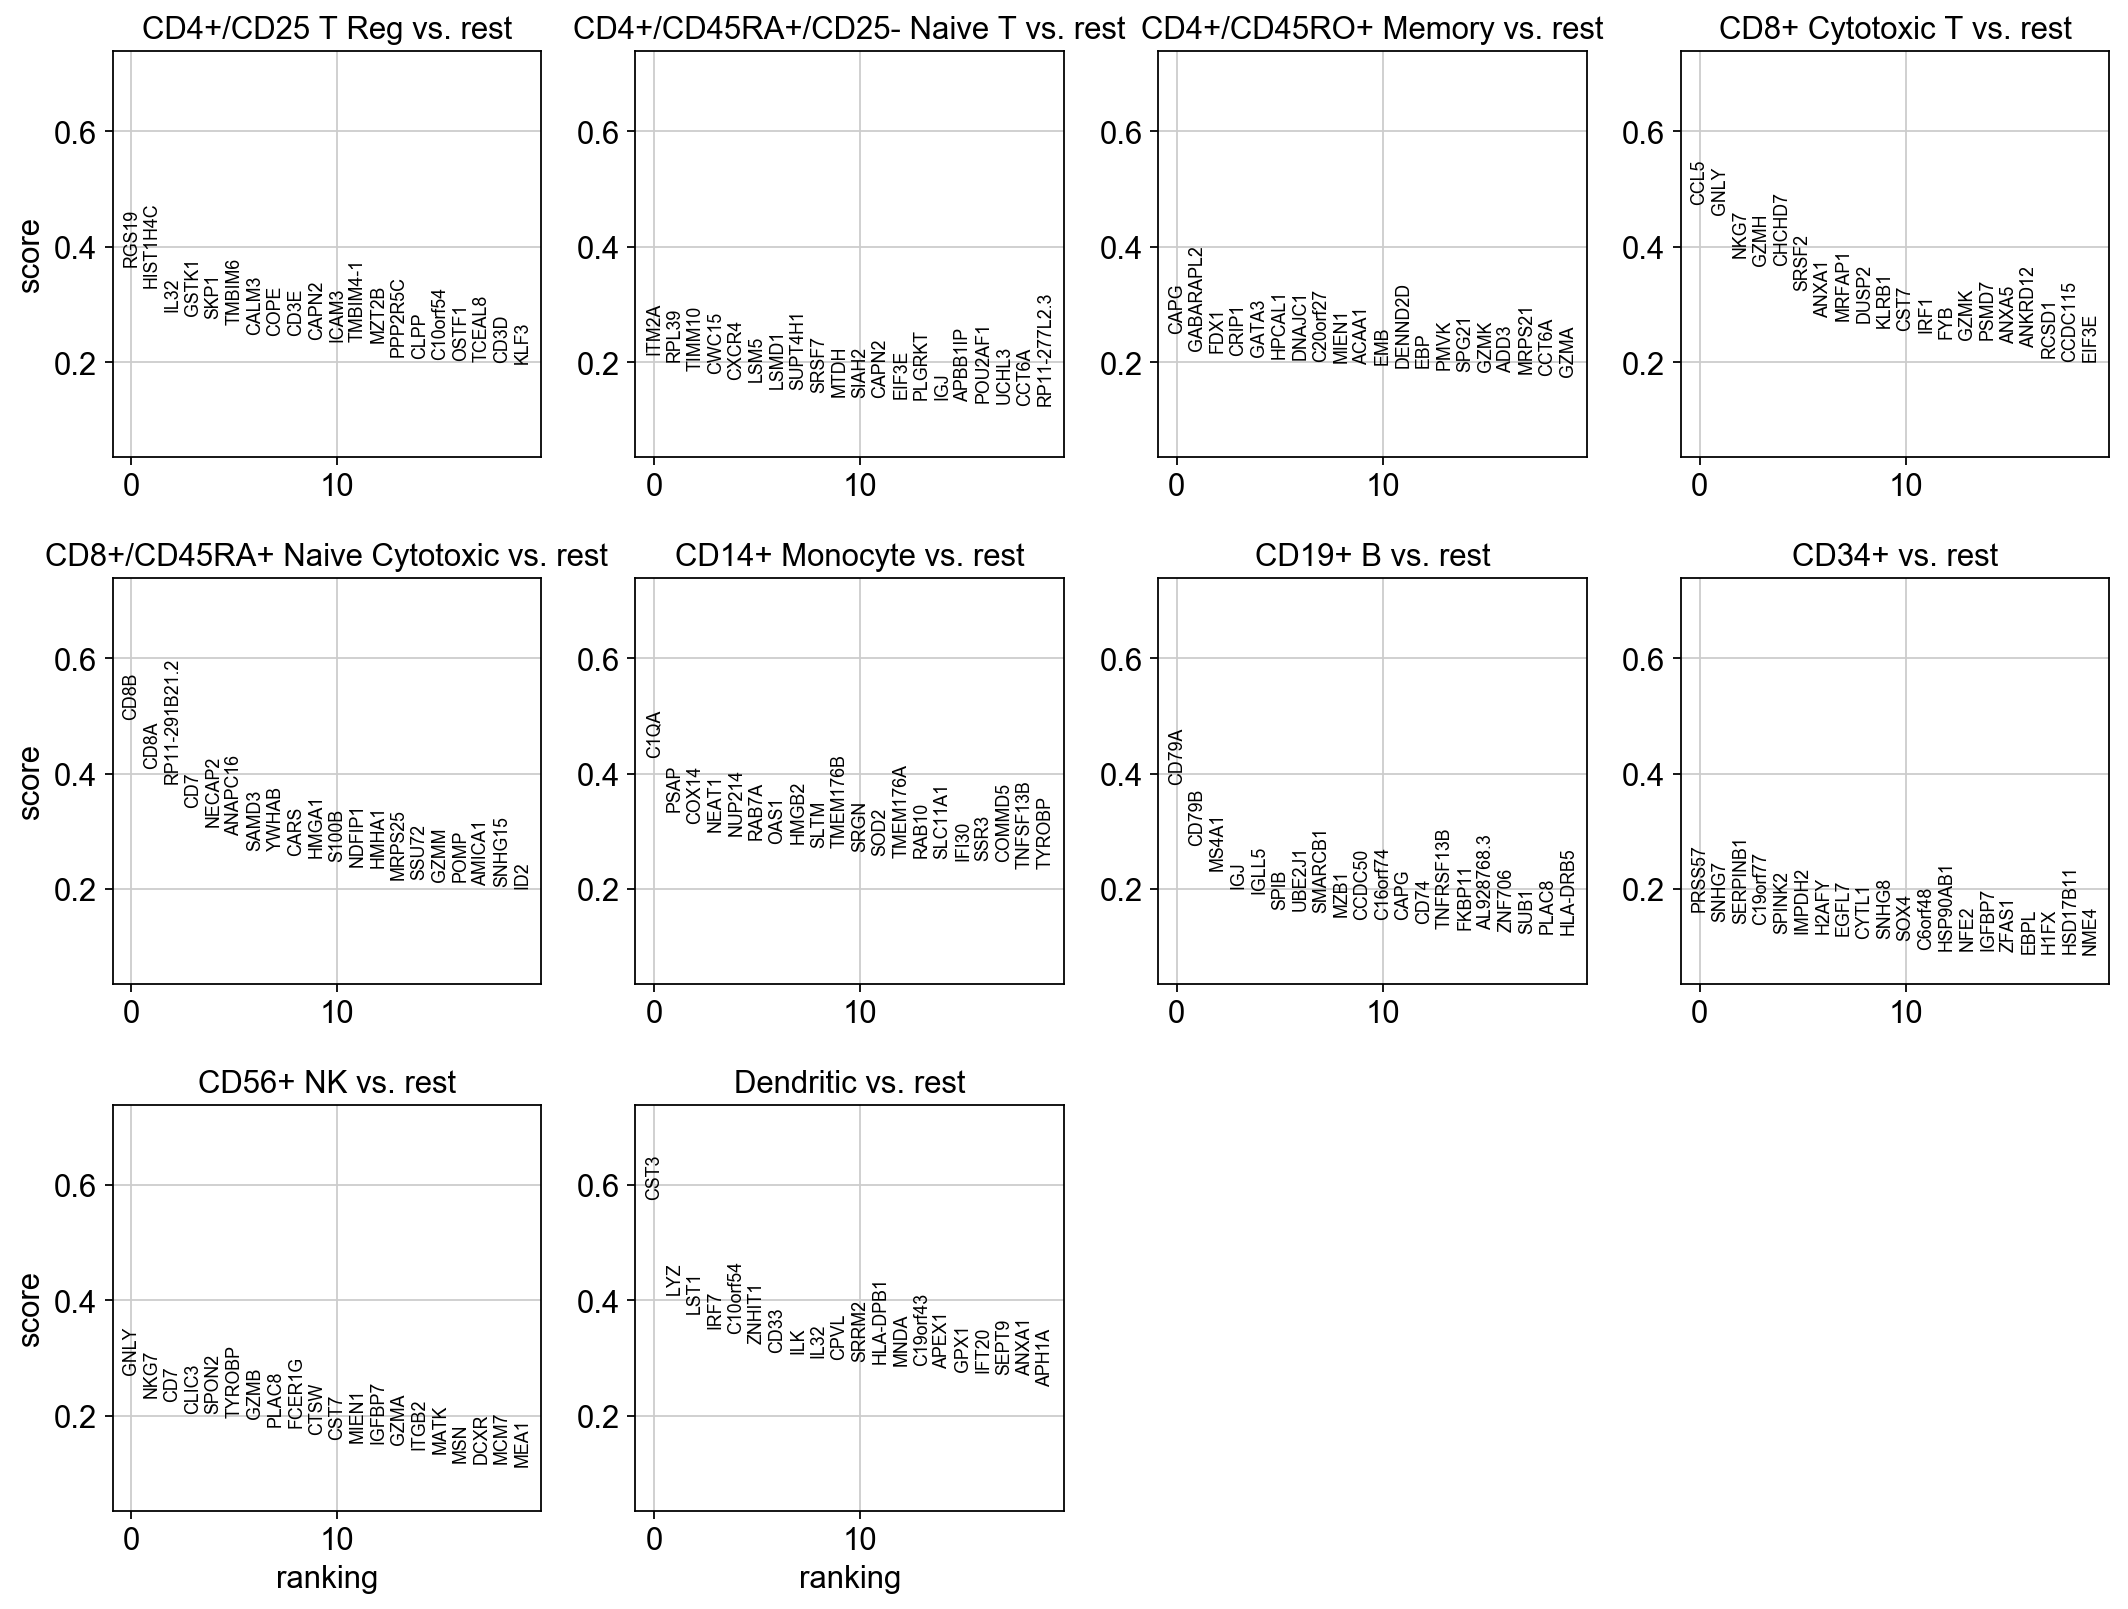

In [19]:
sc.pl.rank_genes_groups(pbmc)

Visualize using dotplot.

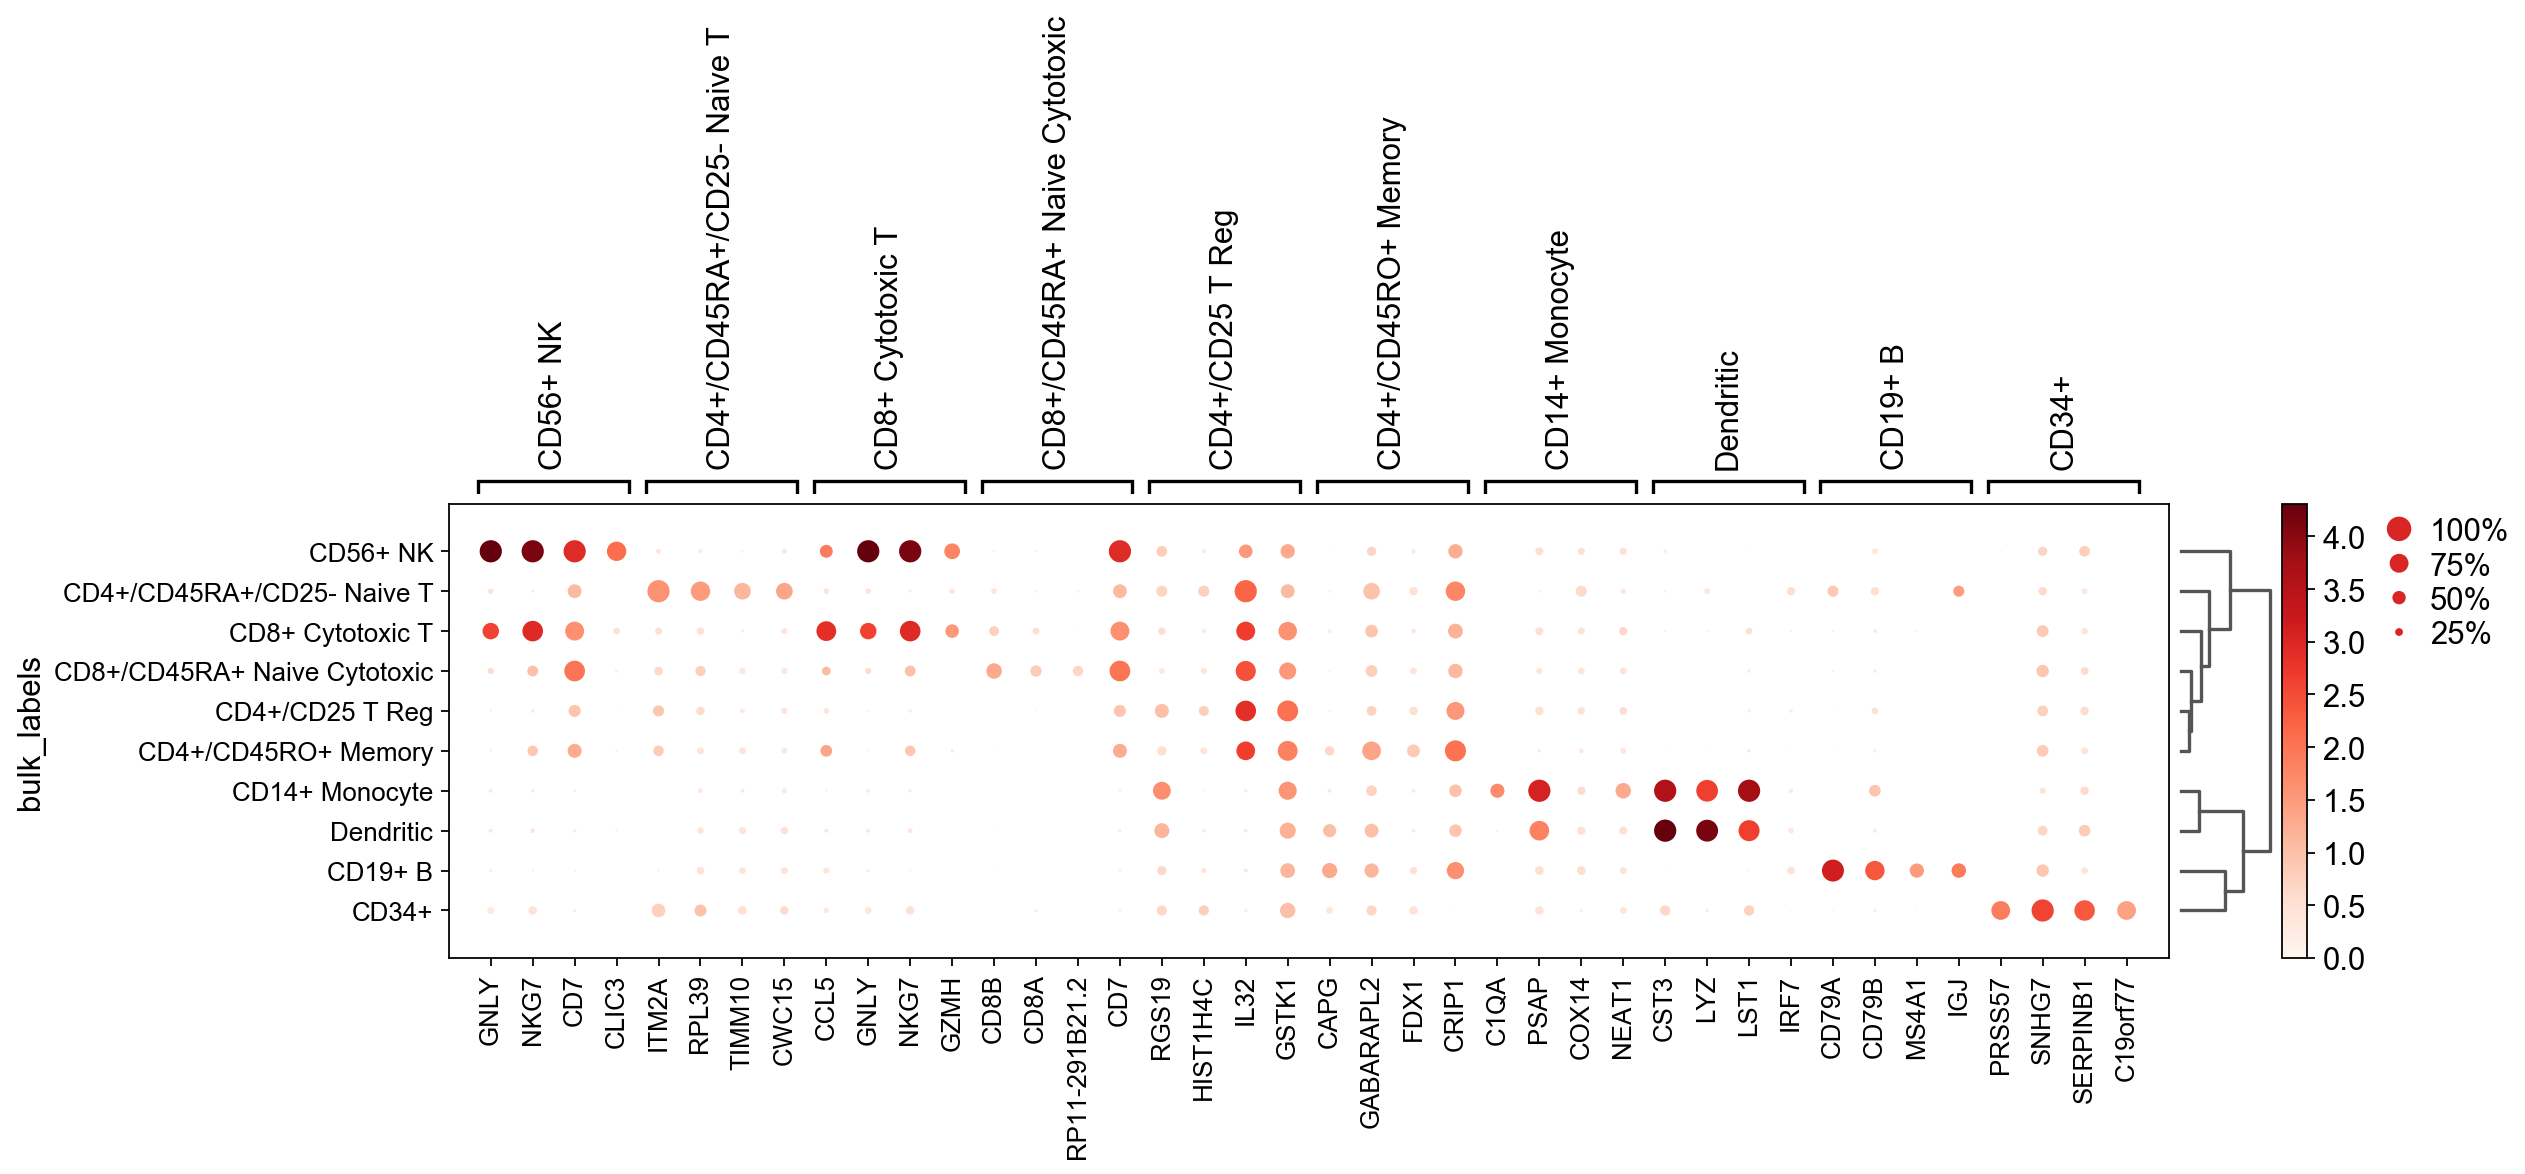

In [20]:
sc.pl.rank_genes_groups_dotplot(pbmc, n_genes=4)

A dotplot focusing only on two groups (the groups option is also available for violin, heatmap and matrix plots).

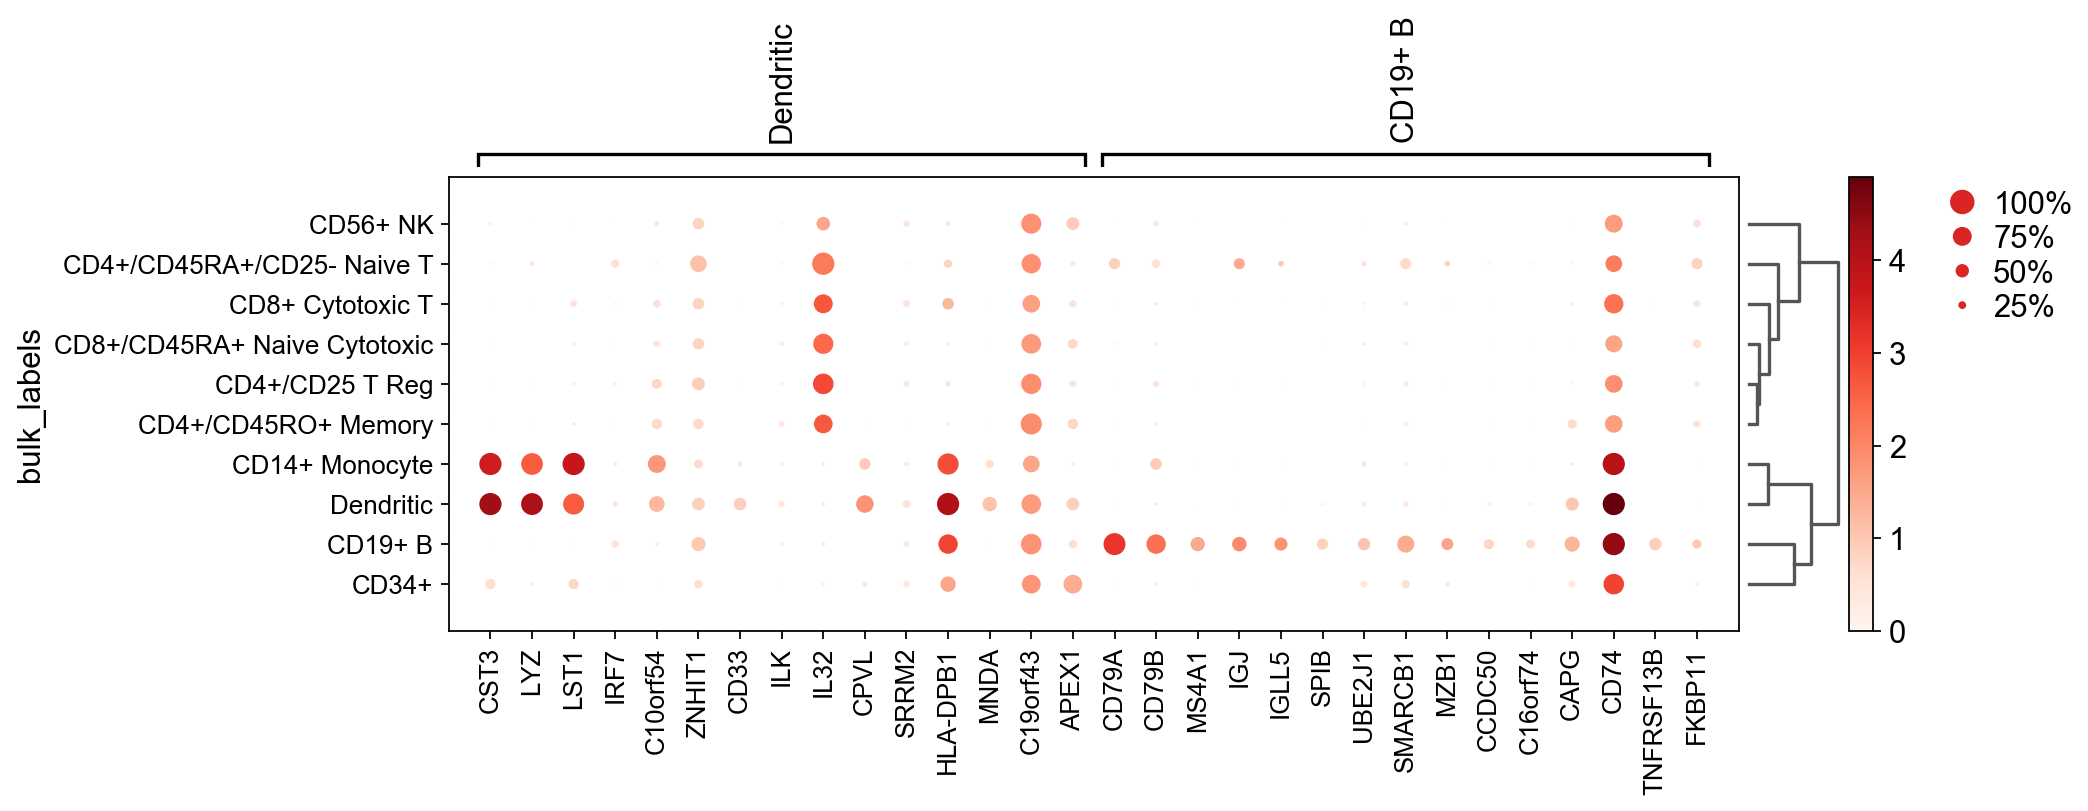

In [21]:
axs = sc.pl.rank_genes_groups_dotplot(pbmc, n_genes=15, groups=['Dendritic', 'CD19+ B'])

A dotplot showing the marker genes but with respect to 'louvain' clusters (same option is also available for violin, heatmap and matrix plots).

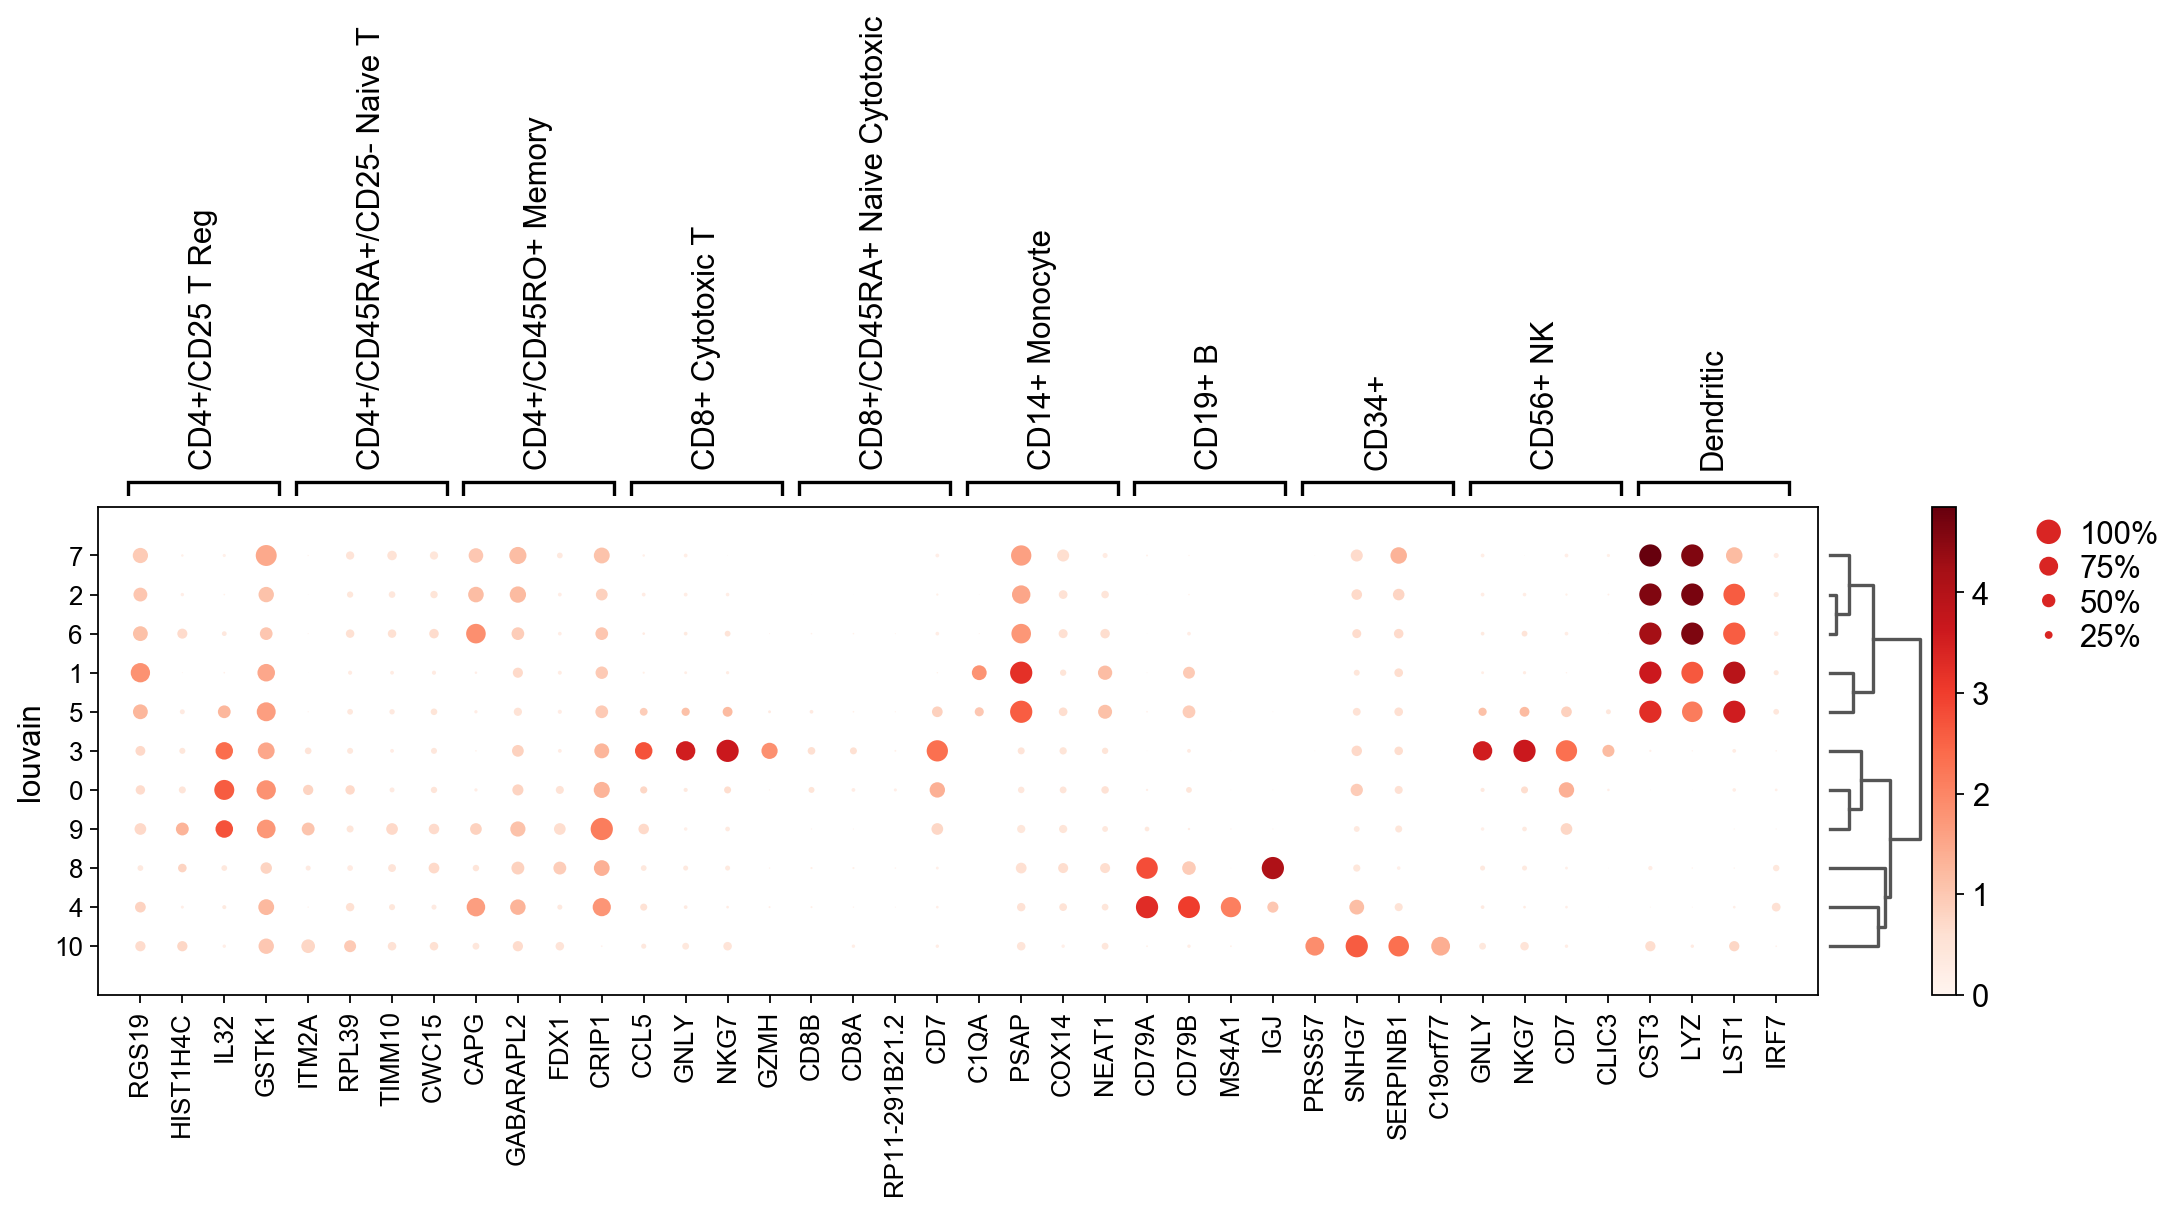

In [22]:
axs = sc.pl.rank_genes_groups_dotplot(pbmc, groupby='louvain', n_genes=4, dendrogram=True)

Visualize using matrixplot.

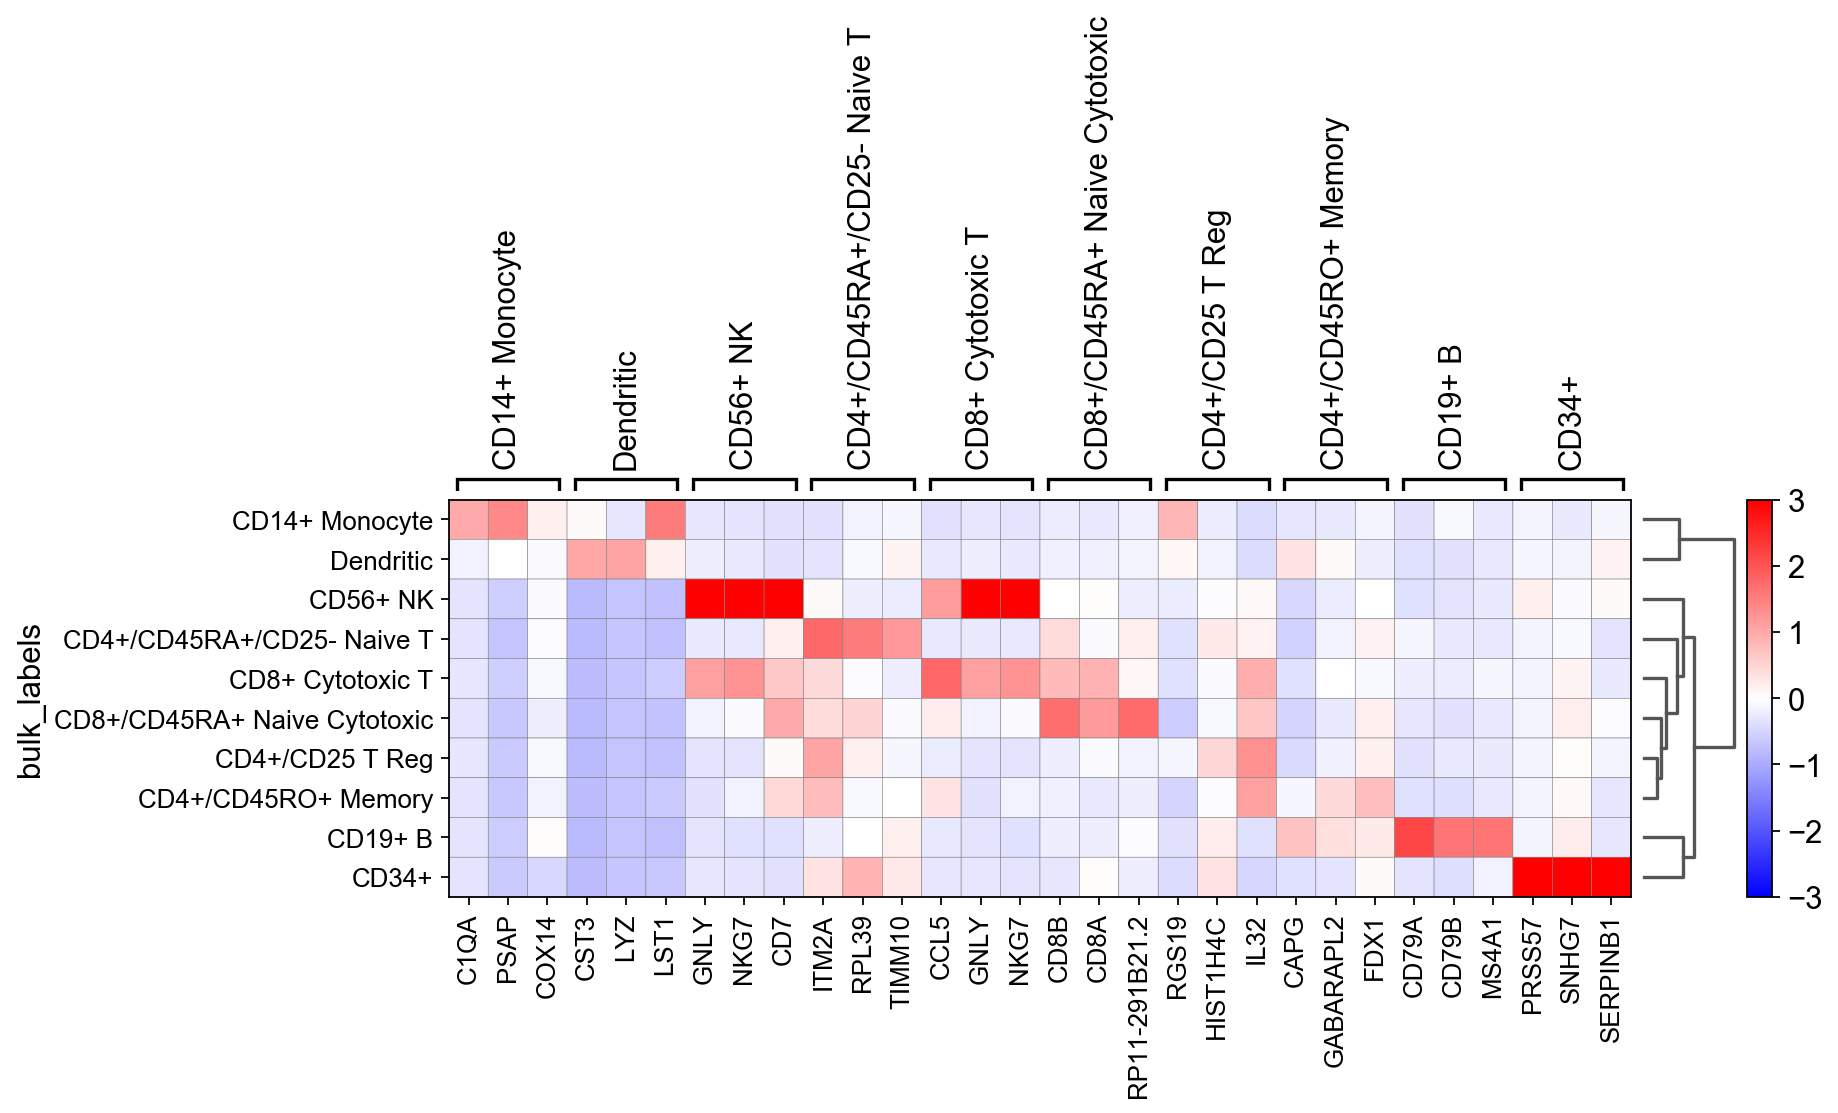

In [23]:
axs = sc.pl.rank_genes_groups_matrixplot(pbmc, n_genes=3, use_raw=False)

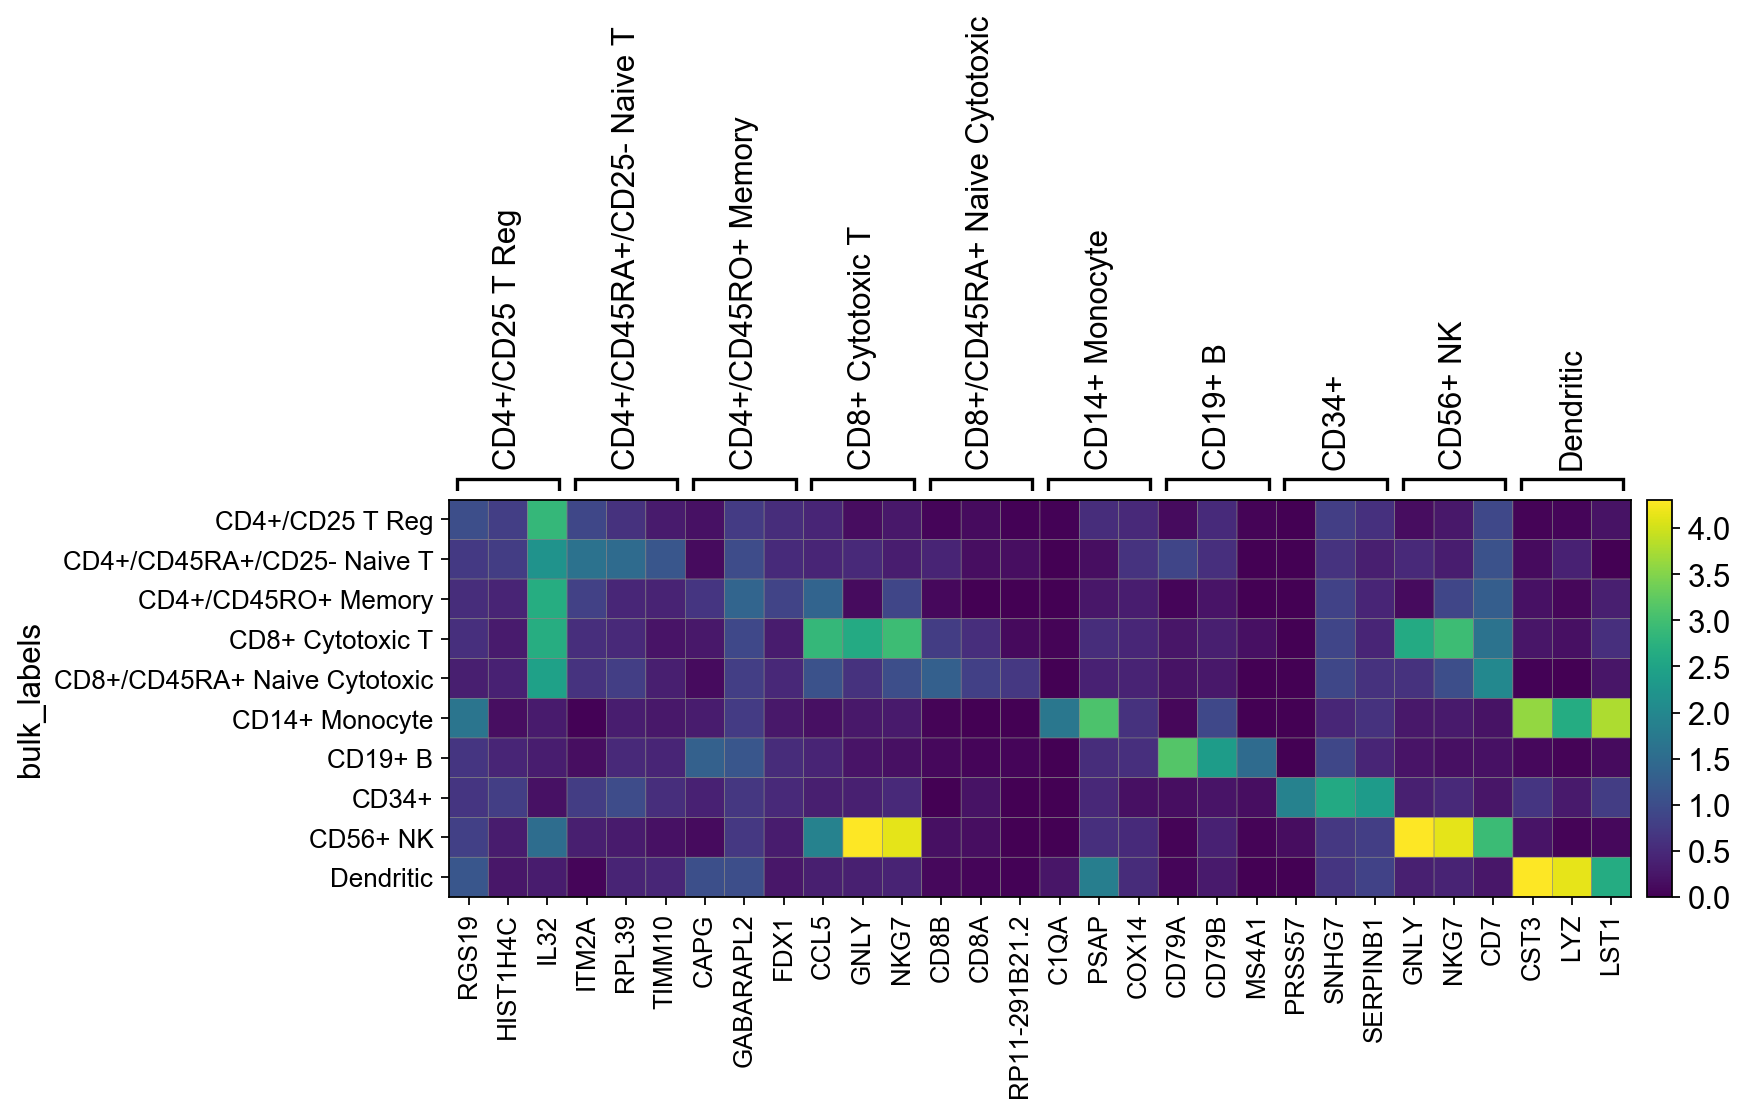

In [24]:
axs = sc.pl.rank_genes_groups_matrixplot(pbmc, n_genes=3, dendrogram=False)

Visualize using stacked violing plots.

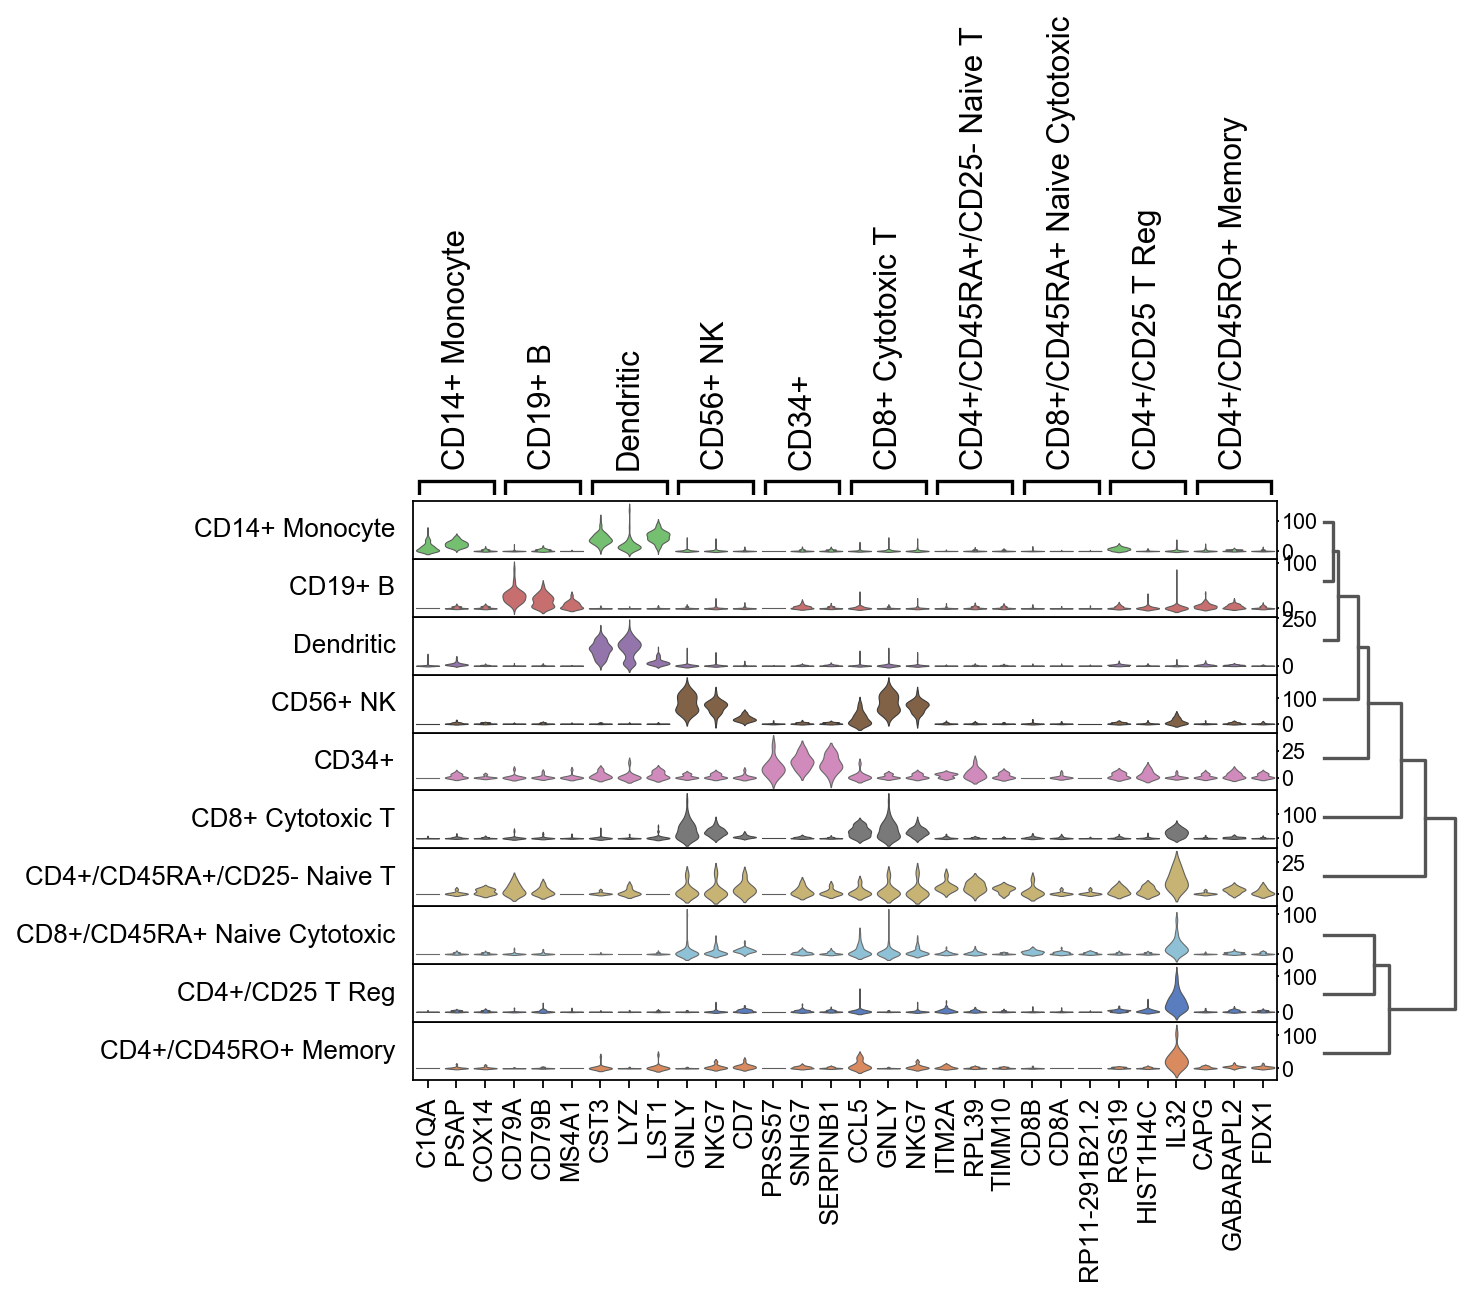

In [25]:
# instead of pbmc we use the 'ad' object (created earlier) in which the raw matrix is exp(pbmc.raw.matrix). This
# highlights the differences between the markers.
sc.pl.rank_genes_groups_stacked_violin(ad, n_genes=3)

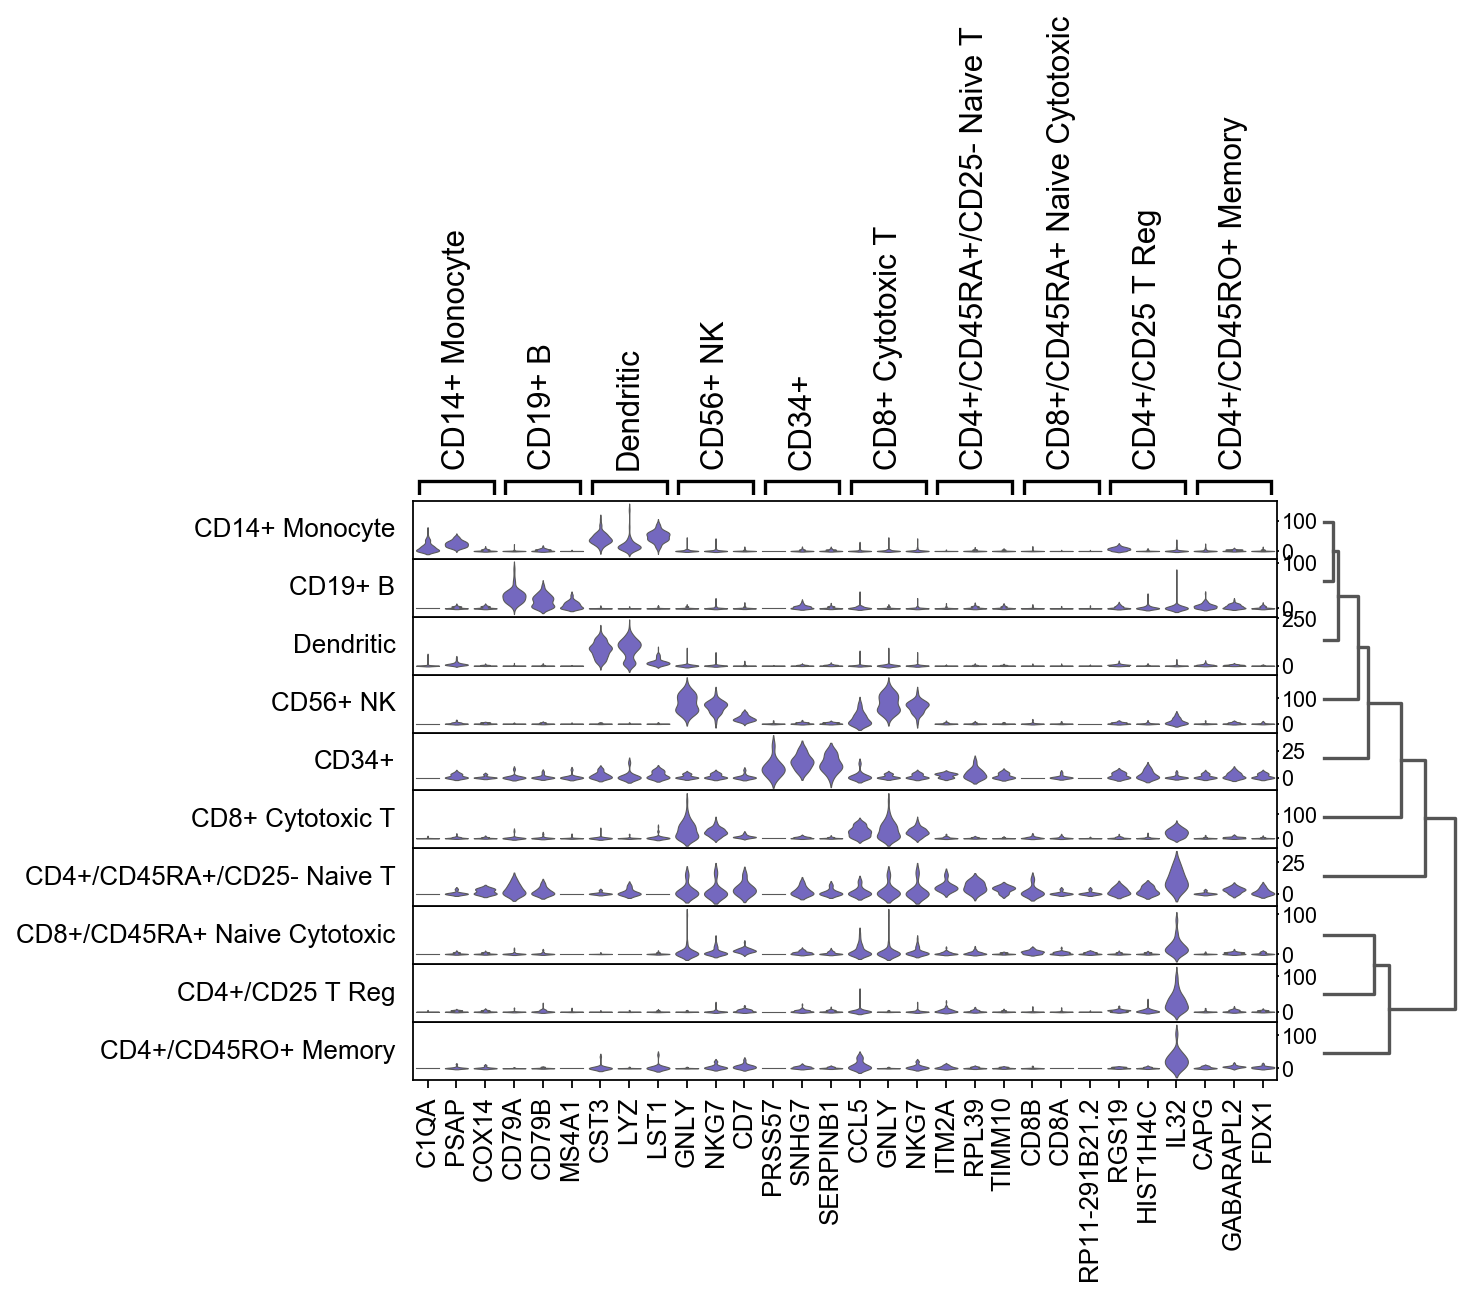

In [26]:
# setting row_palette='slateblue' makes all violin plots of the same color
sc.pl.rank_genes_groups_stacked_violin(ad, n_genes=3, row_palette='slateblue')

Same as previous but with axes swapped.

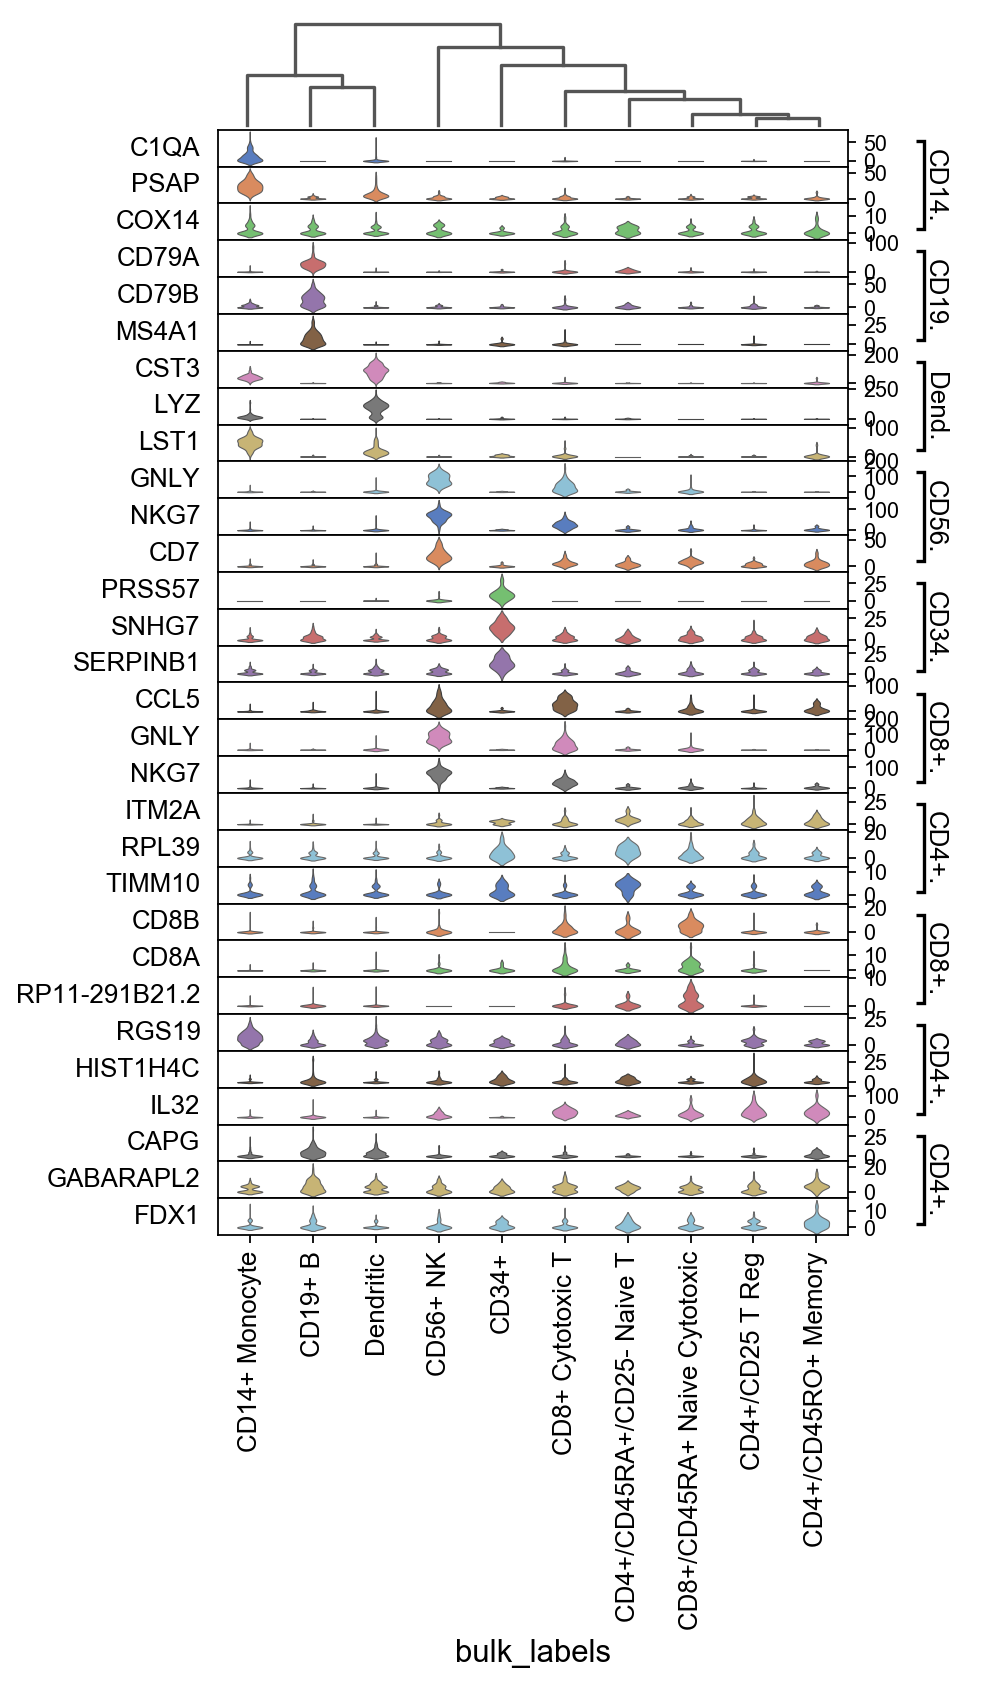

In [27]:
# width is used to set the violin plot width. Here, after setting figsize wider than default,
# the `width` arguments helps to keep the violin plots thin.
sc.pl.rank_genes_groups_stacked_violin(ad, n_genes=3, swap_axes=True, figsize=(6, 10), width=0.4)

Visualize using heatmap.

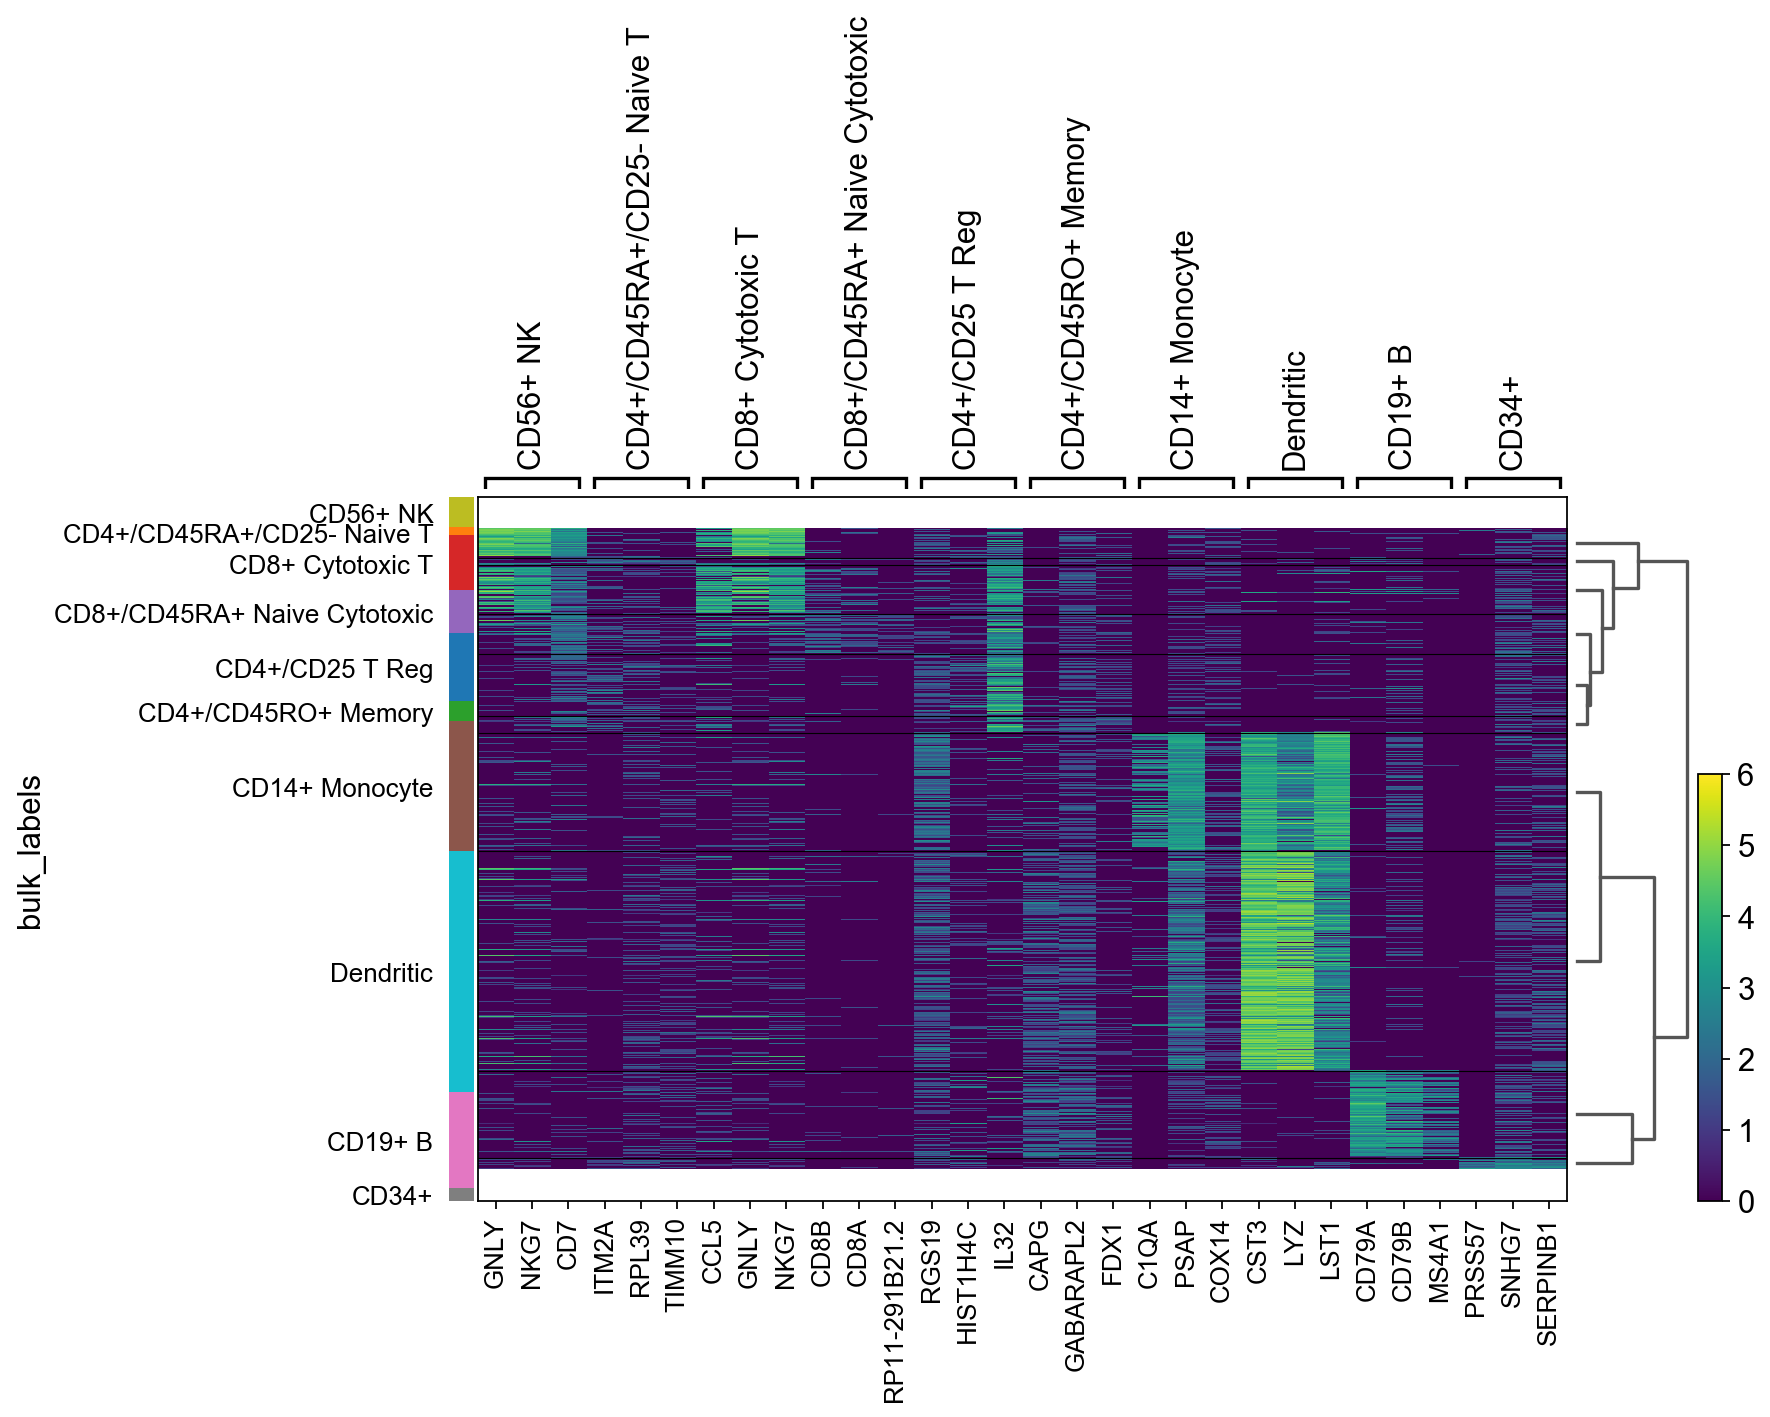

In [28]:
sc.pl.rank_genes_groups_heatmap(pbmc, n_genes=3, vmax=6)

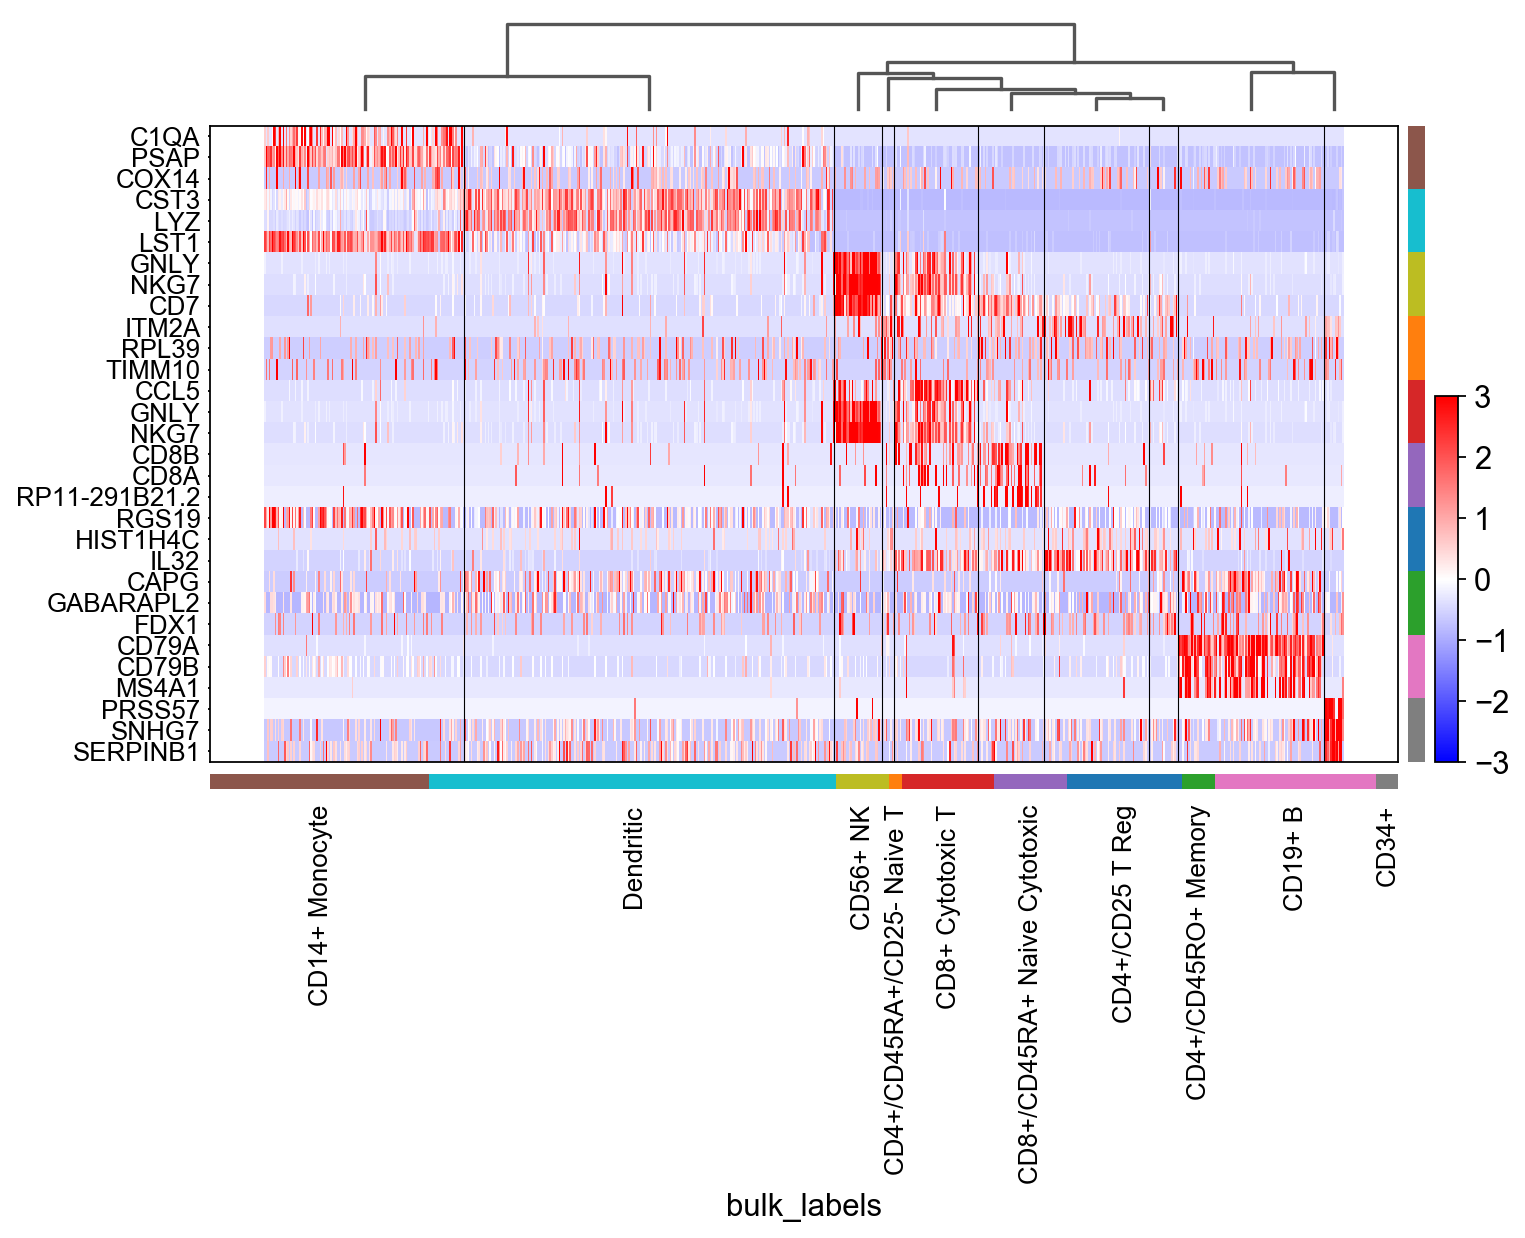

In [29]:
sc.pl.rank_genes_groups_heatmap(pbmc, n_genes=3, use_raw=False, swap_axes=True)

Showing 10 genes per category, turning the gene labels off and swapping the axes. Notice that when the image is swaped, a color code for the categories appear instead of the 'brackets'.

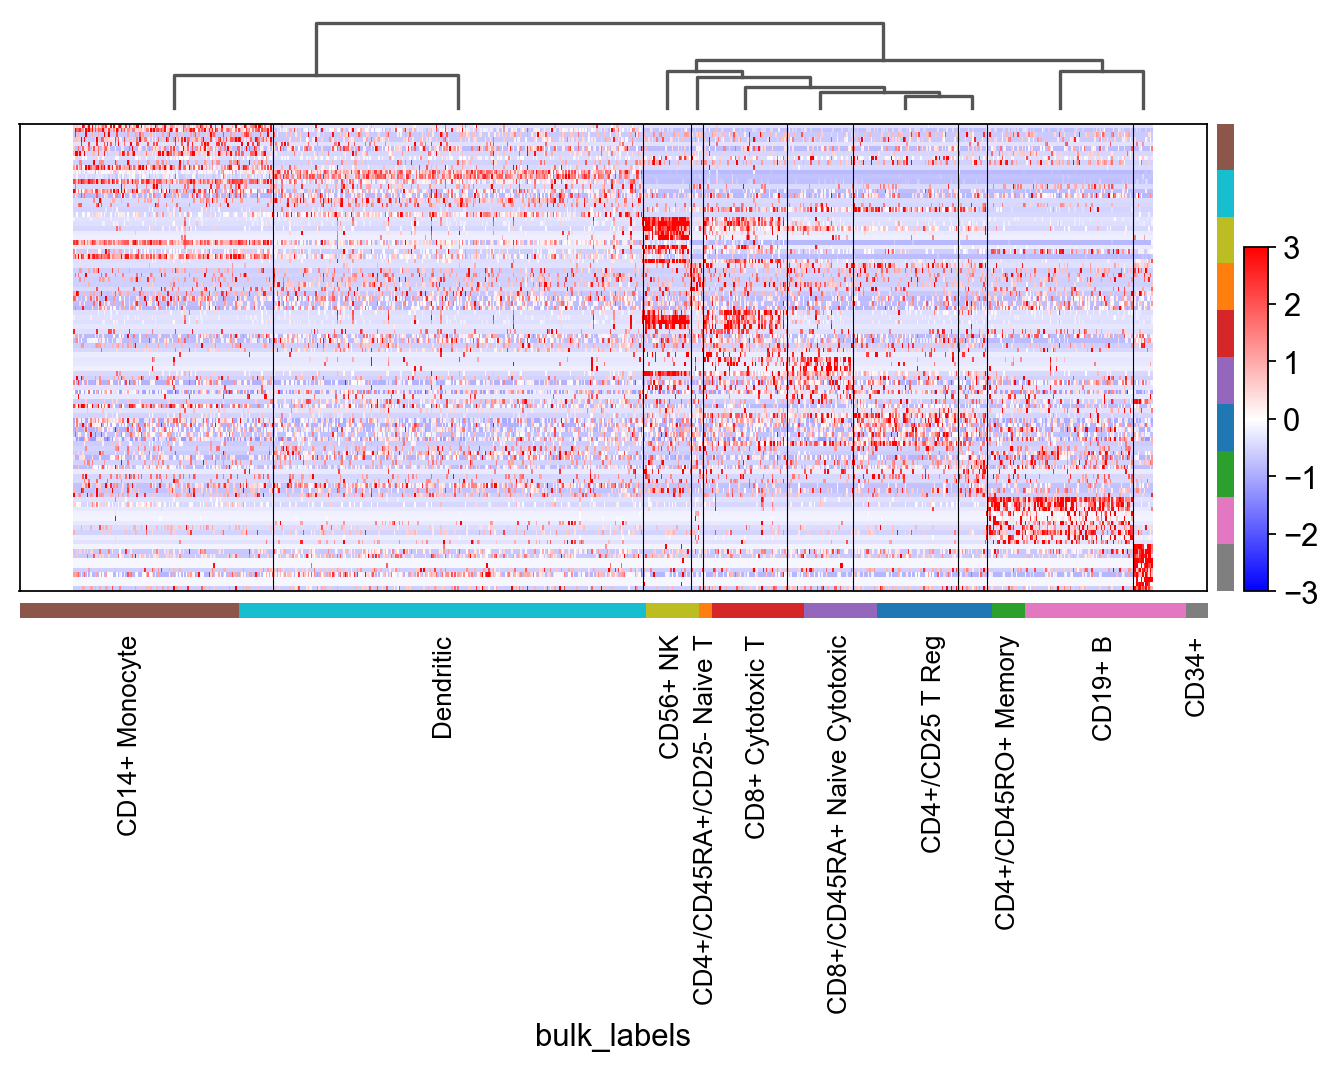

In [30]:
sc.pl.rank_genes_groups_heatmap(pbmc, n_genes=10, use_raw=False, swap_axes=True, show_gene_labels=False)

Visualize using tracksplot.

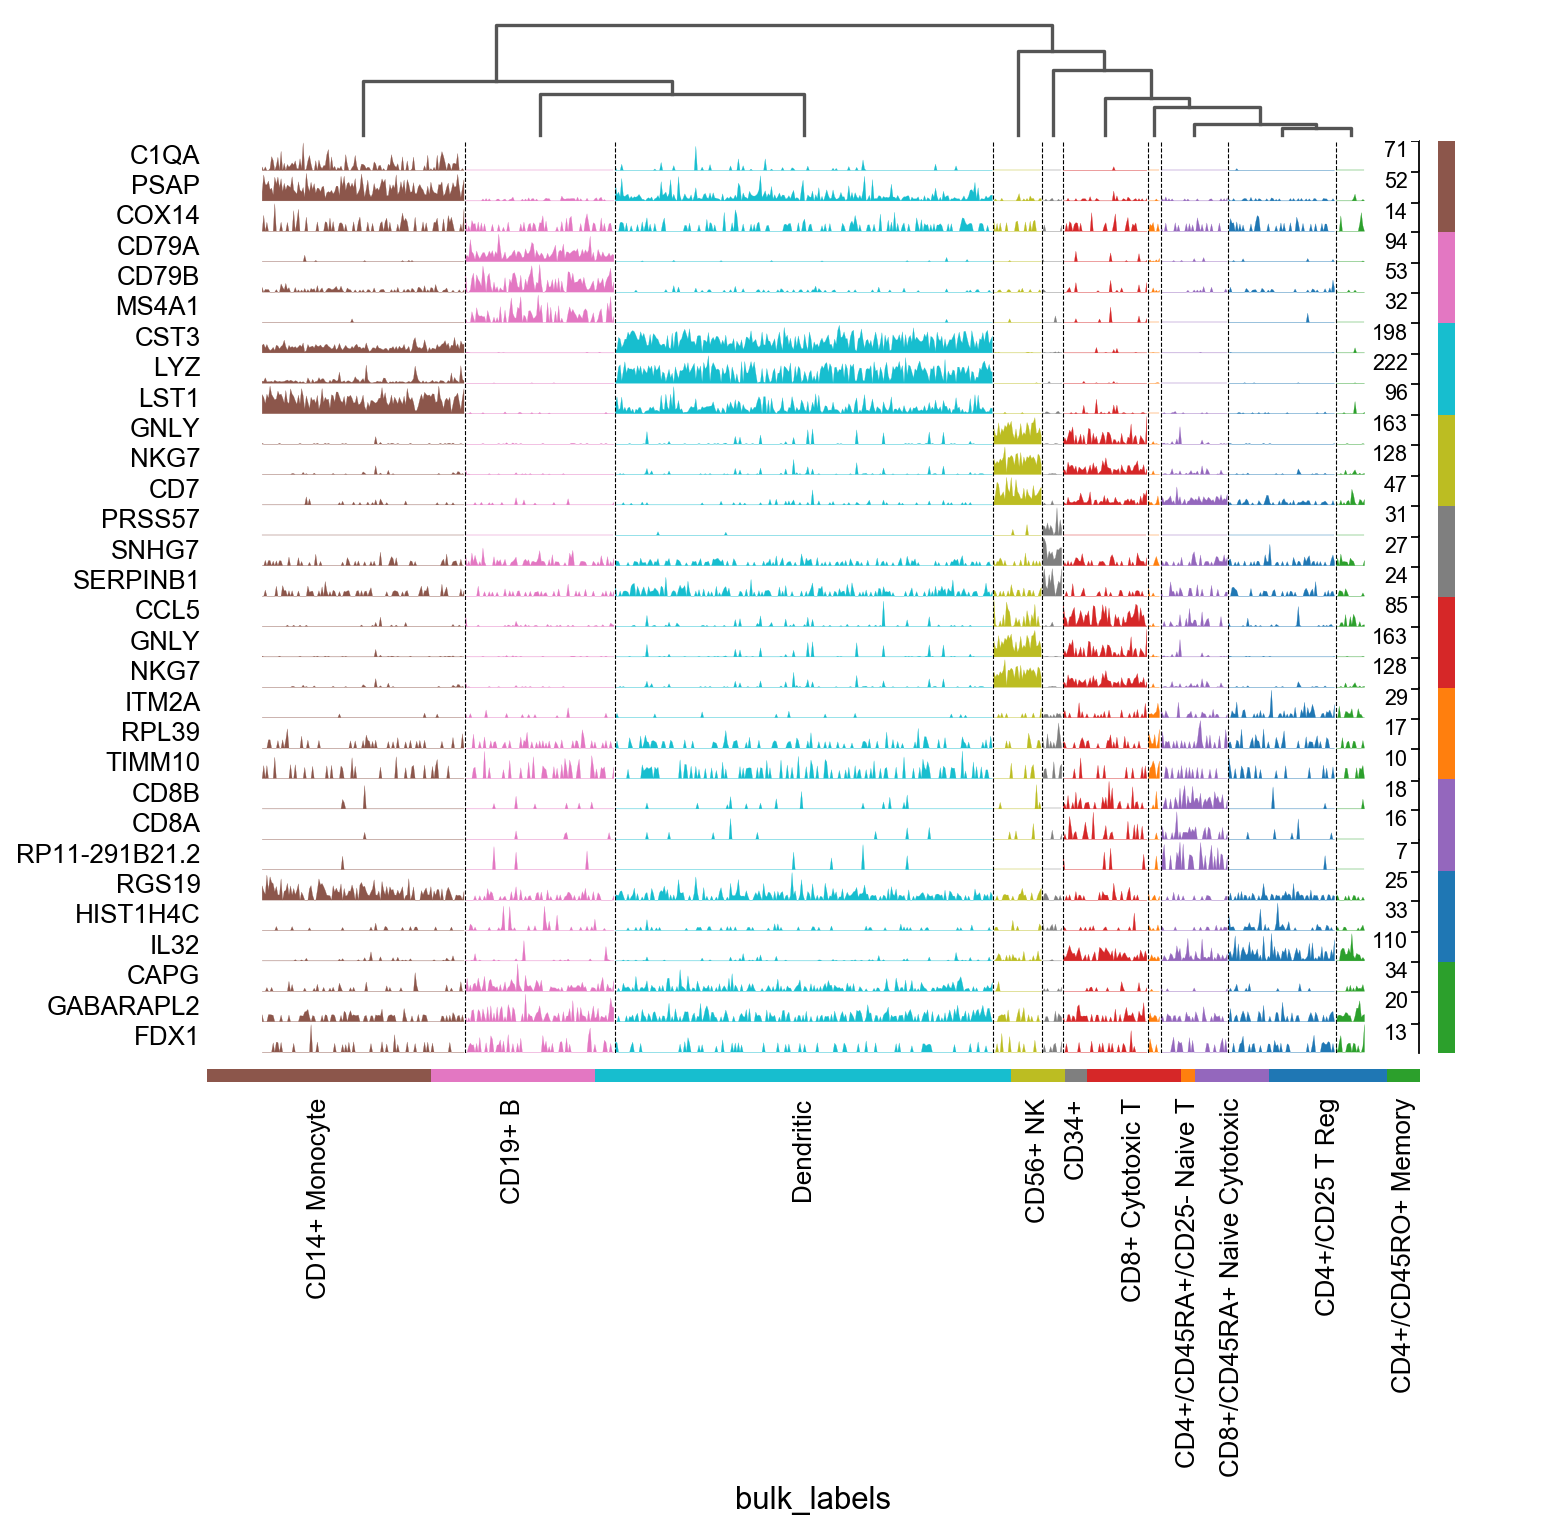

In [31]:
sc.pl.rank_genes_groups_tracksplot(ad, n_genes=3)

Compare CD4+/CD25 T Reg markers vs. rest using violin.

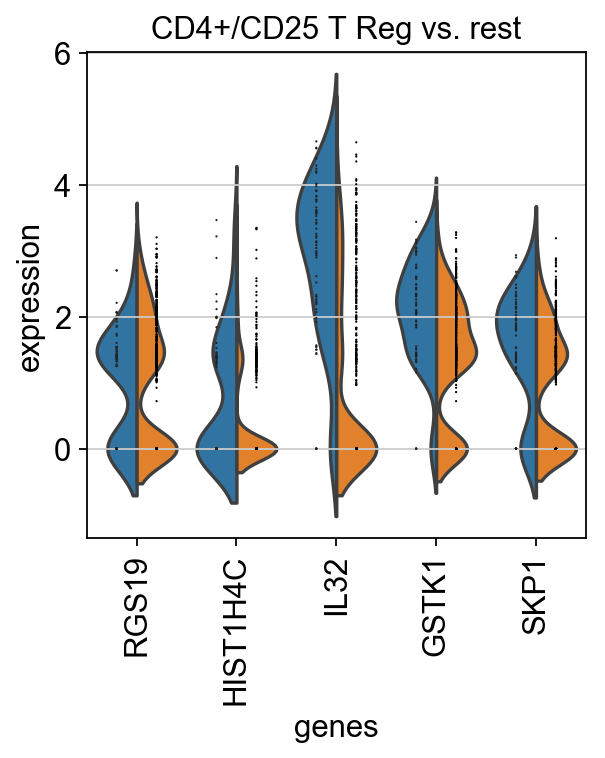

In [32]:
sc.pl.rank_genes_groups_violin(pbmc, groups=pbmc.obs.bulk_labels.cat.categories[0], n_genes=5, jitter=False)